# YD, non-YD analysis

## Importing required modules

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os,json
from collections import defaultdict
from urllib.parse import urlparse
import tldextract
import seaborn as sns


pd.set_option('display.max_columns', None)


In [20]:
df_ydnyd = pd.read_csv(r"C:\Users\Jun Rong\Documents\GitHub\IMDA-Domain-IP-Enrichment\Flask_App\resources\exportdb\20230612_yd_nonyd_20230627_072650.484.csv")  

### Cleaning + Preparing columns

In [21]:
# Removing empty columns

empty_cols = [col for col in df_ydnyd.columns if df_ydnyd[col].isnull().all()]
# Drop these columns from the dataframe
df_ydnyd.drop(empty_cols,
        axis=1,
        inplace=True)


# ## For whois_info.creation_date
def extract_last_value(value):
    format_str = '%d-%m-%YT%H:%M:%S'
#     print(value)
#     print(value,type(value))
    if isinstance(value, str):
        if ',' in value:
#             print(", found", value)
#             print("array found")
            value = value.strip("[]")
            value = value.split(",")
        
            if len(value) > 1:
                
                value = value[-1]
#                 print("value:",value, "len value:",len(value))
                value = value.replace(" ","")
                value = value.strip("'")
#                 print("value:",value, "len value:",len(value))
                value = datetime.strptime(value, format_str)
                return value
#             print(type(value))
        value = value.replace(" ","")
        value = value.strip("'")
        value = datetime.strptime(value, format_str)
#         value = datetime.strptime(value.strip("'"), format_str)
        return value
#             print("value:", value)
#             print("extracted value:", value[-1])
#         return value[-1]
    else:
        return value           
    
def extract_first_value(value):
    format_str = '%d-%m-%YT%H:%M:%S'
#     print(value)
#     print(value,type(value))
    if isinstance(value, str):
        if ',' in value:
#             print(", found", value)
#             print("array found")
            value = value.strip("[]")
            value = value.split(",")
        
            if len(value) > 1:
                
                value = value[0]
#                 print("value:",value, "len value:",len(value))
                value = value.replace(" ","")
                value = value.strip("'")
#                 print("value:",value, "len value:",len(value))
                value = datetime.strptime(value, format_str)
                return value
#             print(type(value))
        value = value.replace(" ","")
        value = value.strip("'")
        value = datetime.strptime(value, format_str)
#         value = datetime.strptime(value.strip("'"), format_str)
        return value
#             print("value:", value)
#             print("extracted value:", value[-1])
#         return value[-1]
    else:
        return value       
                                                                                          

# # Create the new column using the custom function
df_ydnyd['whois_info.creation_date_latest'] = df_ydnyd['whois_info.creation_date'].apply(lambda x: extract_last_value(x))
df_ydnyd['whois_info.creation_date_earliest'] = df_ydnyd['whois_info.creation_date'].apply(lambda x: extract_first_value(x))

In [22]:
df_ydnyd.head()

,Unnamed: 0,_id,domain,report_source,x_days_ago,to_skip,last_analysis_date,reputation,vt_file_location,added_timestamp,processed_timestamp,failure_count,is_priority,source,has_screenshot,has_html,has_javascript,log_file,last_analysis_stats.harmless,last_analysis_stats.malicious,last_analysis_stats.suspicious,last_analysis_stats.undetected,last_analysis_stats.timeout,total_votes.harmless,total_votes.malicious,duration_log.vt_call,duration_log.screenshot,duration_log.grab_html_js,duration_log.get_whois_info,duration_log.get_dns_info,duration_log.get_cert_info,duration_log.get_archived_page_info,whois_info.registrar,whois_info.name,whois_info.org,whois_info.creation_date,whois_info.updated_date,whois_info.whois_file_location,cert_info.common_name,cert_info.name_value,cert_info.issuer_name,cert_info.not_before,cert_info.latest_cert,cert_info.length_cert_json,cert_info.cert_file_location,cert_info.len(SubjectCN_set),cert_info.SubjectCN_set,cert_info.len(Issuer_set),cert_info.Issuer_set,cert_info.len(AltName_set),cert_info.AltName_count_min,cert_info.AltName_count_max,archived_page_info.newest.archive_url,archived_page_info.newest.timestamp,archived_page_info.archived_paged_file_location,dns_info.dns_resolver_query.nameserver_list,dns_info.dns_resolver_query.nameservers_filepath,dns_info.gethostbyname_ex.alias,dns_info.gethostbyname_ex.other_ip_address,dns_info.gethostbyname_ex.gethostbyname_ex_filepath,whois_info.creation_date_latest,whois_info.creation_date_earliest
0,0,648683f0d40b1315463c4c09,1688ypo.com,PID,7,NaN,05-06-2023T09:58:18,0.0,resources/downloaded_vtresponse/12062023/1688y...,12-06-2023T02:33:20,2023-06-12 06:44:22.652000,0,0,resources/upload_folder/domains_20230612_nonYD...,0.0,0.0,0.0,resources/logs/logfile_20230612_064333.204.txt,66.0,0.0,0.0,21.0,0.0,0.0,0.0,2.159007,24.398663,0.079906,1.350637,0.033415,19.972380,1.347137,"Hong Kong Juming Network Technology Co., Ltd.",Redacted for privacy,Redacted for privacy,05-03-2023T05:57:32,"['06-06-2023T01:57:21', '06-06-2023T01:57:25']",resources/whois/1688ypo.com_20230612_064359.92...,1688ypo.com,1688ypo.com,"C=US, O=Let's Encrypt, CN=R3",2023-03-05T05:03:12,2023-03-05T05:03:12,2.0,resources/cert/1688ypo.com_20230612_064401.318...,1.0,['1688ypo.com'],1.0,"[""C=US, O=Let's Encrypt, CN=R3""]",1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-05 05:57:32,2023-03-05 05:57:32
1,1,648683f0d40b1315463c4c0a,1688ypu.com,PID,7,NaN,05-06-2023T10:00:45,0.0,resources/downloaded_vtresponse/12062023/1688y...,12-06-2023T02:33:20,2023-06-12 05:51:18.416000,0,0,resources/upload_folder/domains_20230612_nonYD...,0.0,0.0,0.0,resources/logs/logfile_20230612_042247.080.txt,66.0,0.0,0.0,21.0,0.0,0.0,0.0,0.856638,2.791503,0.061291,0.958474,0.028538,0.968332,0.852818,"Hong Kong Juming Network Technology Co., Ltd.",Redacted for privacy,Redacted for privacy,05-03-2023T05:57:33,"['06-06-2023T01:57:20', '06-06-2023T01:57:25']",resources/whois/1688ypu.com_20230612_055115.59...,1688ypu.com,1688ypu.com,"C=US, O=Let's Encrypt, CN=R3",2023-03-05T05:06:04,2023-03-05T05:06:04,2.0,resources/cert/1688ypu.com_20230612_055116.593...,1.0,['1688ypu.com'],1.0,"[""C=US, O=Let's Encrypt, CN=R3""]",1.0,1.0,1.0,https://web.archive.org/web/20230305060817/htt...,05-03-2023T06:08:17,resources/archived_page/1688ypu.com_20230612_0...,NaN,NaN,NaN,NaN,NaN,2023-03-05 05:57:33,2023-03-05 05:57:33
2,2,648683f0d40b1315463c4c0b,ae.1688oka.com,PID,7,NaN,05-06-2023T09:55:55,0.0,resources/downloaded_vtresponse/12062023/ae.16...,12-06-2023T02:33:20,2023-06-12 06:44:29.593000,0,0,resources/upload_folder/domains_20230612_nonYD...,0.0,0.0,0.0,resources/logs/logfile_20230612_064333.204.txt,65.0,0.0,0.0,22.0,0.0,0.0,0.0,0.991781,3.048442,0.079813,0.965314,0.033882,0.797877,0.888057,Gname.com Pte. Ltd.,Redacted for privacy,Redacted for privacy,05-04-2023T03:03:49,"['05-06-2023T08:28:40', '05-06-2023T08:28:48']",resources/whois/ae.1688oka.com_20230612_064426...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://web.archive.org

In [23]:
df_ydnyd['report_source'].value_counts()

report_source
YD       927
r0005    439
PID      164
r0008     14
r0010     10
Name: count, dtype: int64

In [27]:
## converting to timestamps
# df_ydnyd['blocklist_addition_date'] = pd.to_datetime(df_ydnyd['blocklist_addition_date'], format = '%d-%m-%Y')
df_ydnyd['processed_timestamp'] = pd.to_datetime(df_ydnyd['processed_timestamp'], format = '%y-%m-%dT%H:%M:%S')
df_ydnyd['cert_info.latest_cert'] = pd.to_datetime(df_ydnyd['cert_info.latest_cert'], format = '%Y-%m-%dT%H:%M:%S')
df_ydnyd['whois_info.creation_date_latest'] = pd.to_datetime(df_ydnyd['whois_info.creation_date_latest'], format = '%d-%m-%YT%H:%M:%S')
df_ydnyd['whois_info.creation_date_earliest'] = pd.to_datetime(df_ydnyd['whois_info.creation_date_earliest'], format = '%d-%m-%YT%H:%M:%S')
df_ydnyd['processed_timestamp'] = pd.to_datetime(df_ydnyd['processed_timestamp'], format = '%Y-%m-%dT%H:%M:%S')
# 0      11-04-2023T05:46:04
# 2023-06-07T23:17:54.408+00:00



ValueError: time data "2023-06-12 06:44:22.652000" doesn't match format "%y-%m-%dT%H:%M:%S", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [25]:
mask = (df_twobatch['blocklist_addition_date'] >= '2023-03-08') & (df_twobatch['blocklist_addition_date'] <= '2023-03-12')
df1 = df_twobatch[mask]

mask = (df_twobatch['blocklist_addition_date'] >= '2023-04-08') & (df_twobatch['blocklist_addition_date'] <= '2023-04-12')
df2 = df_twobatch[mask]

mask = (df_1000['blocklist_addition_date'] >= '2023-04-24') & (df_1000['blocklist_addition_date'] <= '2023-04-30')
df3 = df_1000[mask]

mask = (df_1000['blocklist_addition_date'] >= '2023-05-01') & (df_1000['blocklist_addition_date'] <= '2023-05-07')
df4 = df_1000[mask]

df1=df1.reset_index(drop=True)
df2=df2.reset_index(drop=True)
df3=df3.reset_index(drop=True)
df4=df4.reset_index(drop=True)

NameError: name 'df_twobatch' is not defined

In [15]:
df2

,Unnamed: 0,_id,domain,blocklist_addition_date,x_days_ago,to_skip,last_analysis_date,reputation,added_timestamp,processed_timestamp,failure_count,is_priority,source,has_screenshot,has_html,has_javascript,files_log,log_file,last_analysis_stats.harmless,last_analysis_stats.malicious,last_analysis_stats.suspicious,last_analysis_stats.undetected,last_analysis_stats.timeout,total_votes.harmless,total_votes.malicious,duration_log.vt_call,duration_log.screenshot,duration_log.grab_html_js,duration_log.get_whois_info,duration_log.get_dns_info,duration_log.get_cert_info,duration_log.get_archived_page_info,whois_info.registrar,whois_info.name,whois_info.org,whois_info.creation_date,whois_info.updated_date,whois_info.whois_file_location,dns_info.gethostbyname_ex.alias,dns_info.gethostbyname_ex.other_ip_address,dns_info.gethostbyname_ex.gethostbyname_ex_filepath,dns_info.dns_resolver_query.nameserver_list,dns_info.dns_resolver_query.nameservers_filepath,cert_info.common_name,cert_info.name_value,cert_info.issuer_name,cert_info.not_before,cert_info.latest_cert,cert_info.length_cert_json,cert_info.cert_file_location,cert_info.len(SubjectCN_set),cert_info.SubjectCN_set,cert_info.len(Issuer_set),cert_info.Issuer_set,cert_info.len(AltName_set),cert_info.AltName_count_min,cert_info.AltName_count_max,archived_page_info.newest.archive_url,archived_page_info.newest.timestamp,archived_page_info.archived_paged_file_location,whois_info.creation_date_latest,whois_info.creation_date_earliest
0,229,645da76f7b4cbcb7ca236734,singpass.gonapp.net,2023-04-08,7,NaN,08-04-2023T07:43:56,0,12-05-2023T10:41:51,2023-05-15 20:54:39,0,0,resources/upload_folder/8_to_12_apr_20230512_1...,1,1,0,"[{'type': 'http_screenshot', 'stderr': ""Screen...",resources/logs/logfile_20230515_181749.956.txt,0,0,0,86,0,0,0,1.232987,12.580231,2.471848,0.545259,0.682265,0.763067,1.003524,"GoDaddy.com, LLC",Registration Private,"Domains By Proxy, LLC","['04-02-2017T02:15:01', '03-02-2017T21:15:01']","['04-02-2023T04:34:36', '03-02-2023T23:34:34']",resources/whois/singpass.gonapp.net_20230515_2...,[],['103.74.122.236'],resources/dns/singpass.gonapp.net_gethostbynam...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-03 21:15:01,2017-02-04 02:15:01
1,230,645da76f7b4cbcb7ca236735,fy86vip99.xyz,2023-04-08,7,NaN,03-04-2023T14:40:33,0,12-05-2023T10:41:51,2023-05-15 20:55:30,0,0,resources/upload_folder/8_to_12_apr_20230512_1...,1,1,0,"[{'type': 'http_screenshot', 'stderr': ""Screen...",resources/logs/logfile_20230515_181749.956.txt,65,0,1,21,0,0,0,1.651077,7.983360,1.692813,1.261294,0.461075,38.784660,0.860322,DYNADOT LLC,REDACTED FOR PRIVACY,Super Privacy Service LTD c/o Dynadot,05-03-2023T10:54:49,"['26-04-2023T20:07:16', '24-03-2023T10:08:25']",resources/whois/fy86vip99.xyz_20230515_205449....,[],['192.151.197.75'],resources/dns/fy86vip99.xyz_gethostbyname_ex_2...,"['ns1.dyna-ns.net.', 'ns2.dyna-ns.net.']",resources/dns/fy86vip99.xyz_nameservers_202305...,fy86vip18.xyz,fy86vip99.xyz,"C=US, O=Let's Encrypt, CN=R3",2023-03-24T09:13:06,2023-03-24 09:13:06,2.0,resources/cert/fy86vip99.xyz_20230515_205451.1...,1.0,['fy86vip18.xyz'],1.0,"[""C=US, O=Let's Encrypt, CN=R3""]",1.0,1.0,1.0,https://web.archive.org/web/20230330002222/htt...,30-03-2023T00:22:22,resources/archived_page/fy86vip99.xyz_20230515...,2023-03-05 10:54:49,2023-03-05 10:54:49
2,231,645da76f7b4cbcb7ca236736,lazada-ph.com,2023-04-08,7,NaN,23-04-2023T11:13:30,0,12-05-2023T10:41:51,2023-05-15 20:55:38,0,0,resources/upload_folder/8_to_12_apr_20230512_1...,1,1,0,"[{'type': 'http_screenshot', 'stderr': 'Traceb...",resources/logs/logfile_20230515_181749.956.txt,60,6,0,21,0,0,0,1.075234,3.906073,0.644524,0.808393,0.572856,0.766076,0.696836,Gname.com Pte. Ltd.,Redacted for privacy,Redacted for privacy,05-04-2023T09:02:39,"['05-05-2023T13:53:08', '05-05-2023T13:53:09']",resources/whois/lazada-ph.com_20230515_205535....,NaN,NaN,NaN,"['ns1.gname.net.', 'ns2.gname.net.']",resources/dns/lazada-ph.com_nameservers_

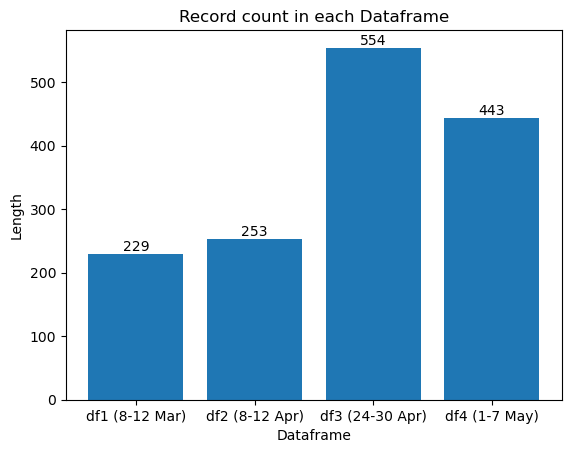

In [16]:
# Calculate the lengths of each dataframe
lengths = [len(df1), len(df2), len(df3), len(df4)]

# Create a bar plot
plt.bar(['df1 (8-12 Mar)', 'df2 (8-12 Apr)', 'df3 (24-30 Apr)', 'df4 (1-7 May)'], lengths)
plt.xlabel('Dataframe')
plt.ylabel('Length')
plt.title('Record count in each Dataframe')

for i, length in enumerate(lengths):
    plt.text(i, length, str(length), ha='center', va='bottom')
    
plt.show()

# Checks:

## Check 1: Multiple Unique Subject CNs

#### Initial (Why are we looking at this?)
* something in your cert history?
* Impersonating? 
* Malicious websites chaning SubjectCN to evade detection?
    * Blocked due to filtered traffic by SubjectCN (Extraction of SubjectCN from certificate during handshake)
 
 
Show screenshot for: crt-sh for internet-baking-sg-diigii.com
* impersonating sg digibank, cimb and commonwealth bank

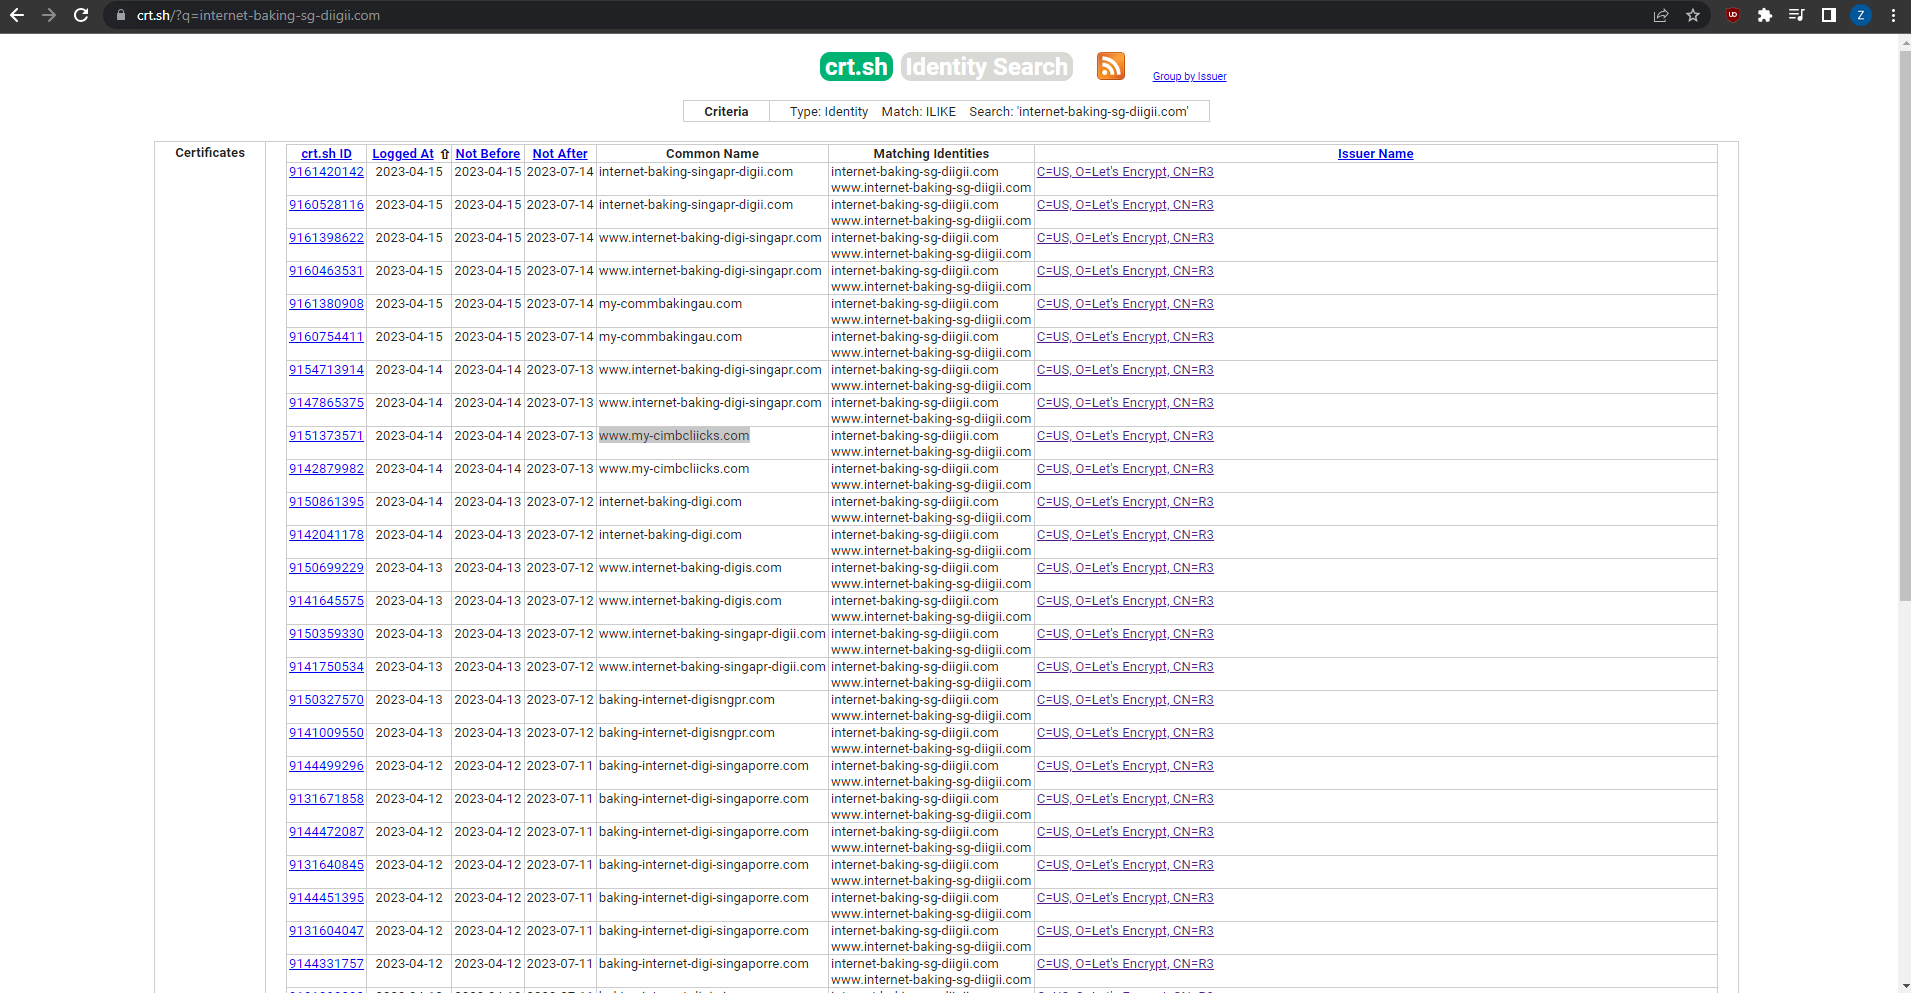

- https://crt.sh/?q=internet-baking-sg-diigii.com
- https://crt.sh/?id=9151373571

### this subject cn showed up in other certs because it was listed as a Subject Alternative Name --> If we do abit more analysis before we send PID (e.g. this domain has been seen somewhere else before, then it could be block!)   + show the image of it being in SAN

Currently PID gets it from user report. Potentially feed them data points

In [17]:
## SHOW JONATHAN
## URL PARSER DOESNT WORK IF in scenarios with subdomain vs domain


# url = "//www.facebook.com/hello"
# url = "//reschedule-track.com/secureJsp.php?&URI=1a78e09b36dd9349af6a929c067e7a85&sessionid=58a7e760c929a6fa9439dd63b90e87a1&securessl=true"
# url = "http://docs.python.org:80/3/library/urllib.parse.html?highlight=params#url-parsing"
# url = "//ad.simonshop.com"
url = "//app.simonshop.com"
# url = "//*.simonshop.com"
# url ="//facebook.com"
parsed_url = urlparse(url)
parsed_url
# parsed_url.hostname.split('.')[0]


ParseResult(scheme='', netloc='app.simonshop.com', path='', params='', query='', fragment='')

In [18]:
## Alternative: tldextract
# extract = tldextract.extract("reschedule-track.com/secureJsp.php?&URI=1a78e09b36dd9349af6a929c067e7a85&sessionid=58a7e760c929a6fa9439dd63b90e87a1&securessl=true")
url = '*.binance-sgd-club.pages.dev'
url = 'app.simonshop.com'
extract = tldextract.extract(url)
print(extract)
extract.domain
print("domain:", extract.domain)

ExtractResult(subdomain='app', domain='simonshop', suffix='com')
domain: simonshop


In [19]:
urls = ["www.facebook.com","wunderfauks-signin.com/#/pages/index/index", "xxmtkm.info/final-draft-coordinated-public-transportation-plan-released-for-review-comment/?", "wunderfauks-develop.com/#/pages/start/start", "e-lazada.com/#/login/index", "eufmyio.shop/products/05-stories-of-chata-patti-crimson-wedding-22", "krakenbq.cc/index/user/indexhtml", "www.forfurniture-downapp.com/", "imgg1265t.xyz/mobile/#/assets", "skyonetrades.com/mobile/en-us/m.html#/myAccount", "fy31bb2392.shop/mobile", "chartercom-singapore-project.pages.dev/#/", "dktunvslkjslgj.com/index/user/login.html", "p-dro.bio/auth", "www.mabangerp.plus/#/login", "dgtsdnvsdhgws.com/index/rot_order/index.html", "espire-home.com/#/pages/index/index", "in2ideas-enhance.com/#/", "shop-e2mallapp.com/to", "snreviews.com/getorder/evaluation", "app.qqcjqff1012.xyz/s/qURj", "app.qqcjqxz1023.xyz/s/mlenderios", "app-a1.ztajhi.cn/s/mlenderios?key=646S56376F6G465D31376383333M031R333X732C39&c=", "reschedule-track.com/secureJsp.php?&URI=1a78e09b36dd9349af6a929c067e7a85&sessionid=58a7e760c929a6fa9439dd63b90e87a1&securessl=true", "www.notchstudio-online.com/#/", "beepmall.app/#/pages/login/login", "zappz-program.com/#/", "www.42matters-app.com/#/pages/userPages/login/login", "forecepts-project.com/#/pages/start/start", "www.impact-eu.com/#/index1", "ksldhglslsdjg.com/index/user/login.html", "unrivaledinsight.com/web", "dbshk.cc/speed.html#/", "www.impact-bv.com/#/index1","www.youtube.com","youtube.com", "rs51rma7kwfuchvsl.7ut37gb.buzz/www.dbs.com.hk"]

In [20]:
for url in urls:
    print("current url:", url)
#     extract = tldextract.extract(url)
#     print(extract)
    if url[0] != '/':
        modified_url = "//" + url
    parsed_url = urlparse(modified_url)
    print(parsed_url)
    print("url:",url)
    print("netloc:",parsed_url.netloc)
    if url == parsed_url.netloc:
        print("is domain")
    print("=====")

current url: www.facebook.com
ParseResult(scheme='', netloc='www.facebook.com', path='', params='', query='', fragment='')
url: www.facebook.com
netloc: www.facebook.com
is domain
=====
current url: wunderfauks-signin.com/#/pages/index/index
ParseResult(scheme='', netloc='wunderfauks-signin.com', path='/', params='', query='', fragment='/pages/index/index')
url: wunderfauks-signin.com/#/pages/index/index
netloc: wunderfauks-signin.com
=====
current url: xxmtkm.info/final-draft-coordinated-public-transportation-plan-released-for-review-comment/?
ParseResult(scheme='', netloc='xxmtkm.info', path='/final-draft-coordinated-public-transportation-plan-released-for-review-comment/', params='', query='', fragment='')
url: xxmtkm.info/final-draft-coordinated-public-transportation-plan-released-for-review-comment/?
netloc: xxmtkm.info
=====
current url: wunderfauks-develop.com/#/pages/start/start
ParseResult(scheme='', netloc='wunderfauks-develop.com', path='/', params='', query='', fragment='/p

In [21]:
## what are Subject CNs? --> Subject Common Name: Information about the entity to which the certificate is issued.
## One CN per Cert. 
## Why are we looking at it? --> While a website can have multiple certificates issued over time,
# each certificate corresponds to a specific period and is tied to a particular domain. e.g. example.com will be issued subjectCN example.com.
#Tryna be dodgy / escape blacklist?


def get_unique_domains(subjectCN_set):
    if isinstance(subjectCN_set, float):
        return False
    
    domain_set = set()
#     print(subjectCN_set)
    subjectCN_set = subjectCN_set.strip('][').split(', ')

    for subjectCN in subjectCN_set:
        subjectCN = subjectCN.replace("'",'')
        extract = tldextract.extract(subjectCN)
#         subdomain = extract.subdomain
        domain = extract.domain
#         print("domain:", domain)
#         suffix = extract.suffix
        domain_set.add(domain)
       
    ## we want if its equal 
    
    ## we want if its not 1
    if len(domain_set) > 1:
        return domain_set
    
    else:
        return False
            
        
df1['unique_domains'] = df1['cert_info.SubjectCN_set'].apply(get_unique_domains)
df2['unique_domains'] = df2['cert_info.SubjectCN_set'].apply(get_unique_domains)
df3['unique_domains'] = df3['cert_info.SubjectCN_set'].apply(get_unique_domains)
df4['unique_domains'] = df4['cert_info.SubjectCN_set'].apply(get_unique_domains)
# df1 [['cert_info.SubjectCN_set','unique_domains']]

In [22]:
# Filter the DataFrame based on the condition
result_df1 = df1[df1['unique_domains'] != False]
result_df2 = df2[df2['unique_domains'] != False]
result_df3 = df3[df3['unique_domains'] != False]
result_df4 = df4[df4['unique_domains'] != False]

result_df1.head()

,Unnamed: 0,_id,domain,blocklist_addition_date,x_days_ago,to_skip,last_analysis_date,reputation,added_timestamp,processed_timestamp,failure_count,is_priority,source,has_screenshot,has_html,has_javascript,files_log,log_file,last_analysis_stats.harmless,last_analysis_stats.malicious,last_analysis_stats.suspicious,last_analysis_stats.undetected,last_analysis_stats.timeout,total_votes.harmless,total_votes.malicious,duration_log.vt_call,duration_log.screenshot,duration_log.grab_html_js,duration_log.get_whois_info,duration_log.get_dns_info,duration_log.get_cert_info,duration_log.get_archived_page_info,whois_info.registrar,whois_info.name,whois_info.org,whois_info.creation_date,whois_info.updated_date,whois_info.whois_file_location,dns_info.gethostbyname_ex.alias,dns_info.gethostbyname_ex.other_ip_address,dns_info.gethostbyname_ex.gethostbyname_ex_filepath,dns_info.dns_resolver_query.nameserver_list,dns_info.dns_resolver_query.nameservers_filepath,cert_info.common_name,cert_info.name_value,cert_info.issuer_name,cert_info.not_before,cert_info.latest_cert,cert_info.length_cert_json,cert_info.cert_file_location,cert_info.len(SubjectCN_set),cert_info.SubjectCN_set,cert_info.len(Issuer_set),cert_info.Issuer_set,cert_info.len(AltName_set),cert_info.AltName_count_min,cert_info.AltName_count_max,archived_page_info.newest.archive_url,archived_page_info.newest.timestamp,archived_page_info.archived_paged_file_location,whois_info.creation_date_latest,whois_info.creation_date_earliest,unique_domains
4,4,645da74e7b4cbcb7ca23663b,unovb.com,2023-03-08,7,1.0,08-03-2023T09:30:15,0,12-05-2023T10:41:18,2023-05-15 17:55:43,0,0,resources/upload_folder/8_to_12_mar_20230512_1...,0,0,0,"[{'type': 'http_screenshot', 'stderr': 'Traceb...",resources/logs/logfile_20230515_175414.382.txt,64,0,0,23,0,0,0,0.895510,5.401339,0.212732,2.124432,0.481974,1.534255,0.907078,"OwnRegistrar, Inc.",Tiff Illa,kelsc,"['12-11-2022T15:26:11', '13-11-2022T00:00:00']","['15-03-2023T12:16:19', '13-11-2022T00:00:00']",resources/whois/unovb.com_20230515_175538.271.txt,NaN,NaN,NaN,NaN,NaN,*.usfsbk.com,usfsbk.unovb.com\nwww.usfsbk.unovb.com,"C=US, O=Let's Encrypt, CN=R3",2023-02-14T06:38:57,2022-11-15 11:32:25,14.0,resources/cert/unovb.com_20230515_175540.879.json,4.0,"['*.usfsbk.com', 'online.unovb.com', 'secure.u...",1.0,"[""C=US, O=Let's Encrypt, CN=R3""]",4.0,2.0,8.0,https://web.archive.org/web/20130426064104/htt...,26-04-2013T06:41:04,resources/archived_page/unovb.com_20230515_175...,2022-11-13 00:00:00,2022-11-12 15:26:11,"{unovb, usfsbk}"
9,9,645da74e7b4cbcb7ca236640,tylysp.com,2023-03-08,7,1.0,01-04-2023T05:32:23,0,12-05-2023T10:41:18,2023-05-15 17:58:57,0,0,resources/upload_folder/8_to_12_mar_20230512_1...,1,1,0,"[{'type': 'http_screenshot', 'stderr': ""Screen...",resources/logs/logfile_20230515_175414.382.txt,64,1,1,21,0,0,0,0.873120,32.918805,23.150524,1.718846,0.691776,2.384281,0.887119,SHANGHAI MEICHENG TECHNOLOGY INFORMATION DEVEL...,REDACTED FOR PRIVACY REDACTED FOR PRIVACY,REDACTED FOR PRIVACY,"['20-05-2016T18:55:09', '21-05-2016T10:55:09']","['06-03-2023T15:10:29', '06-03-2023T20:20:18']",resources/whois/tylysp.com_20230515_175851.695...,[],['154.197.137.91'],resources/dns/tylysp.com_gethostbyname_ex_2023...,"['ns1.dns.com.', 'ns2.dns.com.']",resources/dns/tylysp.com_nameservers_20230515_...,azttcall.com,tylysp.com,"C=US, O=Let's Encrypt, CN=R3",2023-03-08T05:08:50,2022-06-24 14:26:21,8.0,resources/cert/tylysp.com_20230515_175854.097....,2.0,"['tylysp.com', 'azttcall.com']",2.0,"[""C=US, O=Let's Encrypt, CN=E1"", ""C=US, O=Let'...",2.0,1.0,2.0,https://web.archive.org/web/20220414031833/htt...,14-04-2022T03:18:33,resources/archived_page/tylysp.com_20230515_17...,2016-05-21 10:55:09,2016-05-20 18:55:09,"{tylysp, azttcall}"
10,10,645da74e7b4cbcb7ca236641,ubisoftu.cc,2023-03-08,7,1.0,12-05-2023T11:11:23,0,12-05-2023T10:41:18,2023-05-15 17:59:07,1,0,resources/upload_folder/8_to_12_mar_20230512_1...,0,0,0,"[{'type': 'http_screenshot', 'stderr': 'Traceb...",resources/logs/logf

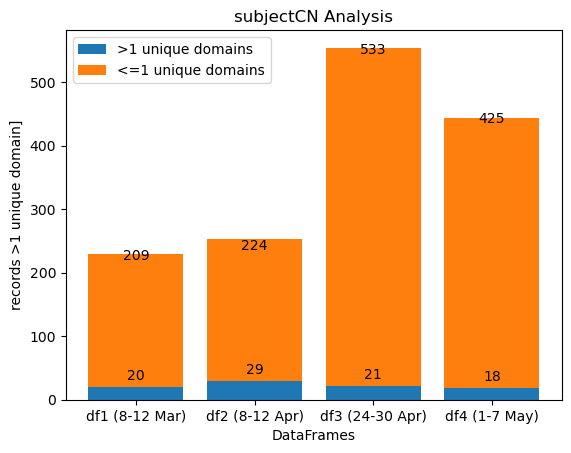

In [23]:
# Define the data
total_records = [len(df1), len(df2), len(df3), len(df4)]
greater_than_one_domain = [len(result_df1), len(result_df2), len(result_df3), len(result_df4)]
# labels = ['df1', 'df2', 'df3', 'df4']
labels = ['df1 (8-12 Mar)', 'df2 (8-12 Apr)', 'df3 (24-30 Apr)', 'df4 (1-7 May)']

# Plot the stacked bar chart
fig, ax = plt.subplots()
bar1 = ax.bar(labels, greater_than_one_domain, label='>1 unique domains')
bar2 = ax.bar(labels, [total - more_than_one for total, more_than_one in zip(total_records, greater_than_one_domain)],
              bottom=greater_than_one_domain, label='<=1 unique domains')

# Add count labels on top of each bar
for rect in bar1 + bar2:
    height = rect.get_height()
    ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('DataFrames')
ax.set_ylabel('records >1 unique domain]')
ax.set_title('subjectCN Analysis')

# Add legend
ax.legend()

# Show the plot
plt.show()


### Results: Not that useful

### Suggestions from team
* Identify large gaps in updated date 
    * potential change in ownership / change in site (scammer took over etc...)

## Check 2: Cert Analysis

* Which issuer certs are attackers using?
* Does age of cert matter (intentional aging)? 

In [24]:
## Dropping rows without certs 
df1_filtered = df1.dropna(subset=['cert_info.latest_cert'])
df2_filtered = df2.dropna(subset=['cert_info.latest_cert'])
df3_filtered = df3.dropna(subset=['cert_info.latest_cert'])
df4_filtered = df4.dropna(subset=['cert_info.latest_cert'])

In [25]:
result_df1 = df1[df1.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 3, axis=1)]
# print("total certs df1:", len(df1))
# print("certs older than 3 months:", len(result_df1))

result_df2 = df2[df2.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 3, axis=1)]
# print("total certs df2:", len(df2))
# print("certs older than 3 months:",len(result_df2))

result_df3 = df3[df3.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 3, axis=1)]
# print("total certs df3:", len(df3))
# print("certs older than 3 months:",len(result_df3))

result_df4 = df4[df4.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 3, axis=1)]
# print("total certs df4:", len(df4))
# print("certs older than 3 months:",len(result_df4))

## what are the certs here --> 

new_df1 = df1[df1.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 12, axis=1)]
new_df2 = df2[df2.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 12, axis=1)]
new_df3 = df3[df3.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 12, axis=1)]
new_df4 = df4[df4.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 12, axis=1)]


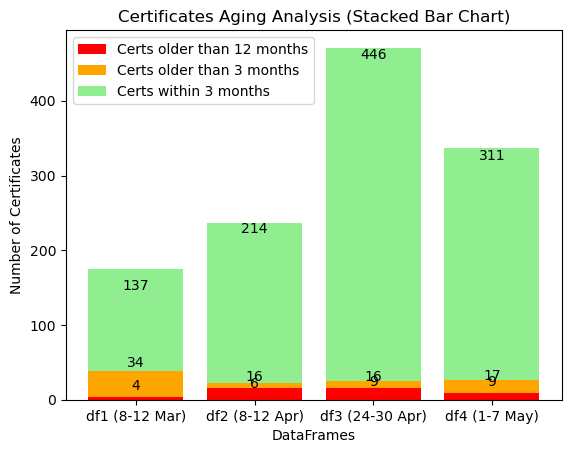

In [26]:
# Define the data
total_certs = [len(df1_filtered), len(df2_filtered), len(df3_filtered), len(df4_filtered)]
certs_older_than_3_months = [len(result_df1) - len(new_df1), len(result_df2) - len(new_df2), len(result_df3) - len(new_df3), len(result_df4) - len(new_df4)]
certs_older_than_12_months = [len(new_df1), len(new_df2), len(new_df3), len(new_df4)]
labels = ['df1 (8-12 Mar)', 'df2 (8-12 Apr)', 'df3 (24-30 Apr)', 'df4 (1-7 May)']

# Calculate cumulative heights of bar1
cumulative_heights1 = certs_older_than_12_months

# Calculate cumulative heights of bar2
cumulative_heights2 = [older_than_12_months + older_than_3_months for older_than_12_months, older_than_3_months in zip(certs_older_than_12_months, certs_older_than_3_months)]

# Set the colors for the bars
colors = ['red', 'orange', 'lightgreen']

# Plot the stacked bar chart
fig, ax = plt.subplots()
bar3 = ax.bar(labels, certs_older_than_12_months, color=colors[0], label='Certs older than 12 months')
bar1 = ax.bar(labels, certs_older_than_3_months, bottom=cumulative_heights1, color=colors[1], label='Certs older than 3 months')
bar2 = ax.bar(labels, [total - older_than_3_months for total, older_than_3_months in zip(total_certs, certs_older_than_3_months)],
              bottom=cumulative_heights2, color=colors[2], label='Certs within 3 months')

# Function to adjust the y-position of the labels
def adjust_label_position(rect, label):
    height = rect.get_height()
    label_y = max(height, 0) + 3
    label.set_position((label.get_position()[0], label_y))

# Add count labels on top of each bar
for rect1, rect2, rect3 in zip(bar3, bar1, bar2):
    height1 = rect1.get_height()
    height2 = rect2.get_height()
    height3 = rect3.get_height()

    label1 = ax.annotate(f'{height1}', xy=(rect1.get_x() + rect1.get_width() / 2, height1),
                         xytext=(0, 3), textcoords="offset points",
                         ha='center', va='bottom')

    label2 = ax.annotate(f'{height2}', xy=(rect2.get_x() + rect2.get_width() / 2, height2),
                         xytext=(0, 3), textcoords="offset points",
                         ha='center', va='bottom')

    label3 = ax.annotate(f'{height3}', xy=(rect3.get_x() + rect3.get_width() / 2, height3),
                         xytext=(0, 3), textcoords="offset points",
                         ha='center', va='bottom')

    # Adjust the y-position of labels
#     adjust_label_position(rect1, label1)
#     adjust_label_position(rect2, label2)
#     adjust_label_position(rect3, label3)

# Set labels and title
ax.set_xlabel('DataFrames')
ax.set_ylabel('Number of Certificates')
ax.set_title('Certificates Aging Analysis (Stacked Bar Chart)')

# Add legend
ax.legend()

# Show the plot
plt.show()


### From this graph, majority are young certs

In [27]:
# df1

In [28]:
result_df1 = df1.dropna(subset=['cert_info.issuer_name'])
result_df2 = df4.dropna(subset=['cert_info.issuer_name'])
result_df3 = df3.dropna(subset=['cert_info.issuer_name'])
result_df4 = df4.dropna(subset=['cert_info.issuer_name'])

def get_issuer(value):
    if pd.isnull(value):  # Check if the value is NaN
#         print("is null")
        return "None"
    else:
        values = value.split(",")
        for value in values:
#             print("value:", value)
            if value.startswith(" O="):
                issuer = value.split("=")[1]
#                 print("extracted issuer:", issuer)
                return issuer

def get_cert_age(processed_timestamp,latest_cert):
#     print("processed_timestamp:", processed_timestamp, type(processed_timestamp))
#     print("latest_cert:", latest_cert, type(latest_cert))
    if pd.isnull(processed_timestamp) or pd.isnull(latest_cert):
        return "None"
    else:
        age = (processed_timestamp - latest_cert).days
        return age
result_df1['cert_info.issuer_name_extracted'] = result_df1['cert_info.issuer_name'].apply(lambda x: get_issuer(x))
result_df2['cert_info.issuer_name_extracted'] = result_df2['cert_info.issuer_name'].apply(lambda x: get_issuer(x))
result_df3['cert_info.issuer_name_extracted'] = result_df3['cert_info.issuer_name'].apply(lambda x: get_issuer(x))
result_df4['cert_info.issuer_name_extracted'] = result_df4['cert_info.issuer_name'].apply(lambda x: get_issuer(x))

# result_df1['cert_age'] = result_df1[['processed_timestamp','cert_info.latest_cert']].apply(lambda x: get_cert_age(*x), axis=1)
result_df1['cert_age'] = result_df1.apply(lambda row: get_cert_age(row['processed_timestamp'], row['cert_info.latest_cert']), axis=1)
result_df2['cert_age'] = result_df2.apply(lambda row: get_cert_age(row['processed_timestamp'], row['cert_info.latest_cert']), axis=1)
result_df3['cert_age'] = result_df3.apply(lambda row: get_cert_age(row['processed_timestamp'], row['cert_info.latest_cert']), axis=1)
result_df4['cert_age'] = result_df4.apply(lambda row: get_cert_age(row['processed_timestamp'], row['cert_info.latest_cert']), axis=1)


C:\Users\Jun Rong\AppData\Local\Temp\ipykernel_29716\3783327237.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df1['cert_info.issuer_name_extracted'] = result_df1['cert_info.issuer_name'].apply(lambda x: get_issuer(x))
C:\Users\Jun Rong\AppData\Local\Temp\ipykernel_29716\3783327237.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df2['cert_info.issuer_name_extracted'] = result_df2['cert_info.issuer_name'].apply(lambda x: get_issuer(x))
C:\Users\Jun Rong\AppData\Local\Temp\ipykernel_2

In [29]:
# result_df1[['cert_age','processed_timestamp','cert_info.latest_cert']]

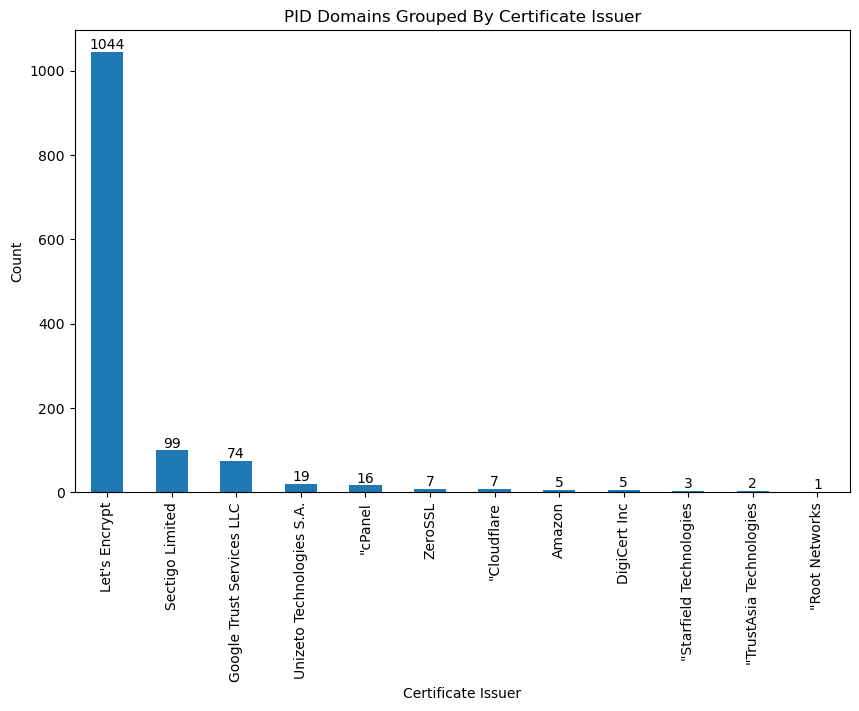

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Concatenate the four DataFrames into a single DataFrame
combined_df = pd.concat([result_df1, result_df2, result_df3, result_df4])
bins = [0, 90, 365, float('inf')]
labels = ['<3 months', '3-12 months', '>12 months']

# Apply pd.cut() to create the new column
combined_df['time_range'] = pd.cut(combined_df['cert_age'], bins=bins, labels=labels, right=False)

# Get the value counts of the categorical column
value_counts = combined_df['cert_info.issuer_name_extracted'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bar_plot = value_counts.plot(kind='bar')

# Adding labels on top of each bar
for i, value in enumerate(value_counts):
    bar_plot.text(i, value, str(value), ha='center', va='bottom')

plt.xlabel('Certificate Issuer')
plt.ylabel('Count')
plt.title('PID Domains Grouped By Certificate Issuer')
plt.show()


<Figure size 1000x600 with 0 Axes>

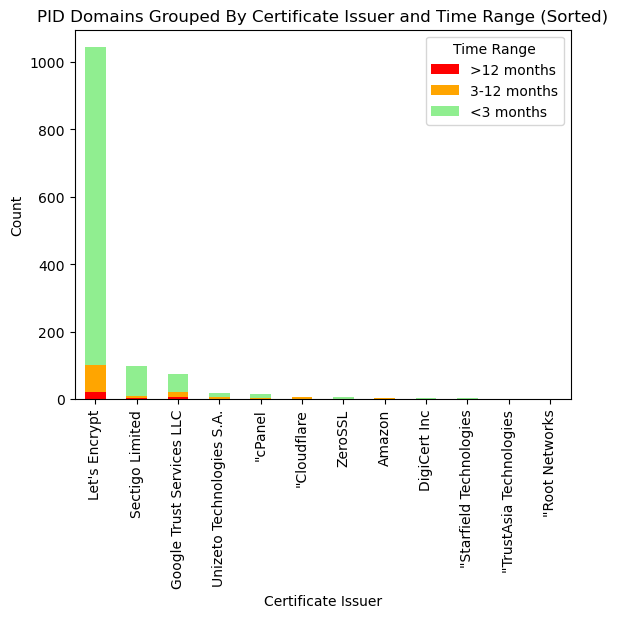

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Concatenate the four DataFrames into a single DataFrame
combined_df = pd.concat([result_df1, result_df2, result_df3, result_df4])
bins = [0, 90, 365, float('inf')]
labels = ['<3 months', '3-12 months', '>12 months']

# Apply pd.cut() to create the new column
combined_df['time_range'] = pd.cut(combined_df['cert_age'], bins=bins, labels=labels, right=False)

# Group by 'cert_info.issuer_name_extracted' and 'time_range', and get the count
grouped_counts = combined_df.groupby(['cert_info.issuer_name_extracted', 'time_range']).size().unstack(fill_value=0)

# Calculate the total count across all time ranges
grouped_counts['Total'] = grouped_counts.sum(axis=1)

# Sort the DataFrame based on the total count
grouped_counts = grouped_counts.sort_values('Total', ascending=False)

# Reorder the columns in the DataFrame to change the stack order
reordered_columns = ['>12 months', '3-12 months', '<3 months']
grouped_counts = grouped_counts[reordered_columns]

colors = ['red', 'orange', 'lightgreen']

# Plotting the sorted stacked bar graph
plt.figure(figsize=(10, 6))
bar_plot = grouped_counts.plot(kind='bar', stacked=True, color=colors)

plt.xlabel('Certificate Issuer')
plt.ylabel('Count')
plt.title('PID Domains Grouped By Certificate Issuer and Time Range (Sorted)')

# # Adding labels for each bar segment
# for container in bar_plot.containers:
#     for bar in container:
#         height = bar.get_height()
#         if height > 0:  # Exclude zero-height segments
#             bar_plot.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Adding legend for the time ranges
legend_labels = grouped_counts.columns
plt.legend(legend_labels, title='Time Range', loc='upper right')

plt.show()


C:\Users\Jun Rong\AppData\Local\Temp\ipykernel_29716\489310443.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df1['cert_info.issuer_name_extracted'] = result_df1['cert_info.issuer_name'].apply(lambda x: get_issuer(x))
C:\Users\Jun Rong\AppData\Local\Temp\ipykernel_29716\489310443.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df2['cert_info.issuer_name_extracted'] = result_df2['cert_info.issuer_name'].apply(lambda x: get_issuer(x))
C:\Users\Jun Rong\AppData\Local\Temp\ipykernel_2

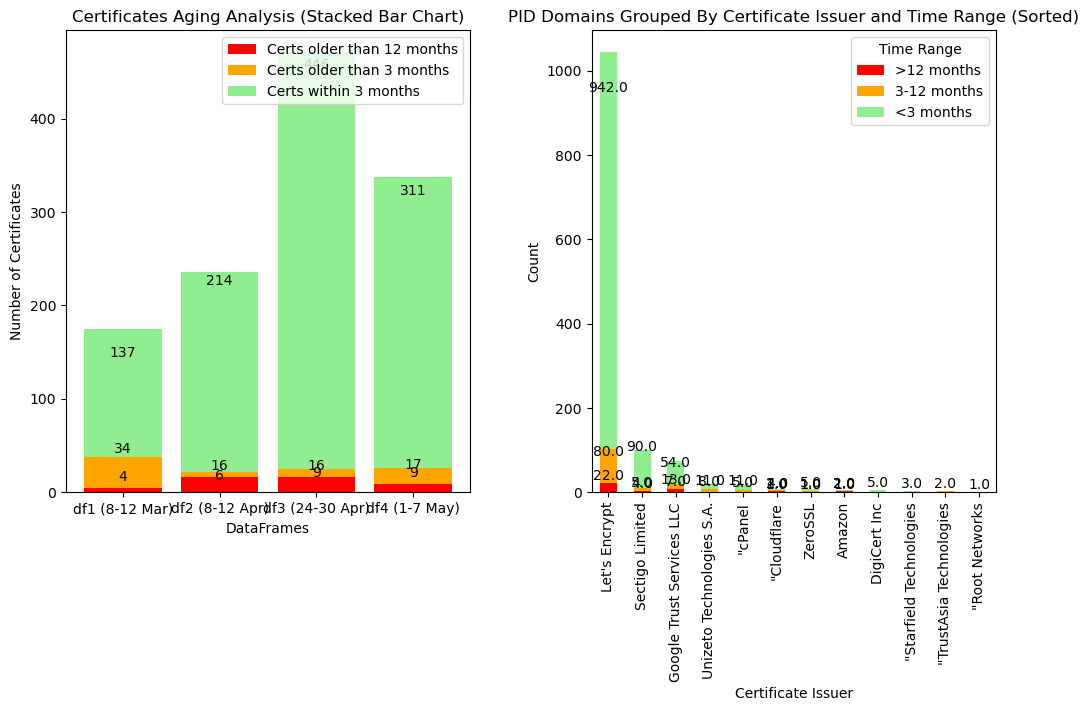

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

## Dropping rows without certs 
df1_filtered = df1.dropna(subset=['cert_info.latest_cert'])
df2_filtered = df2.dropna(subset=['cert_info.latest_cert'])
df3_filtered = df3.dropna(subset=['cert_info.latest_cert'])
df4_filtered = df4.dropna(subset=['cert_info.latest_cert'])
result_df1 = df1[df1.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 3, axis=1)]
# print("total certs df1:", len(df1))
# print("certs older than 3 months:", len(result_df1))

result_df2 = df2[df2.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 3, axis=1)]
# print("total certs df2:", len(df2))
# print("certs older than 3 months:",len(result_df2))

result_df3 = df3[df3.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 3, axis=1)]
# print("total certs df3:", len(df3))
# print("certs older than 3 months:",len(result_df3))

result_df4 = df4[df4.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 3, axis=1)]
# print("total certs df4:", len(df4))
# print("certs older than 3 months:",len(result_df4))

## what are the certs here --> 

new_df1 = df1[df1.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 12, axis=1)]
new_df2 = df2[df2.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 12, axis=1)]
new_df3 = df3[df3.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 12, axis=1)]
new_df4 = df4[df4.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 12, axis=1)]


# Define the data for the first plot
total_certs = [len(df1_filtered), len(df2_filtered), len(df3_filtered), len(df4_filtered)]
certs_older_than_3_months = [len(result_df1) - len(new_df1), len(result_df2) - len(new_df2), len(result_df3) - len(new_df3), len(result_df4) - len(new_df4)]
certs_older_than_12_months = [len(new_df1), len(new_df2), len(new_df3), len(new_df4)]
labels = ['df1 (8-12 Mar)', 'df2 (8-12 Apr)', 'df3 (24-30 Apr)', 'df4 (1-7 May)']

# Calculate cumulative heights of bar1
cumulative_heights1 = certs_older_than_12_months

# Calculate cumulative heights of bar2
cumulative_heights2 = [older_than_12_months + older_than_3_months for older_than_12_months, older_than_3_months in zip(certs_older_than_12_months, certs_older_than_3_months)]

# Set the colors for the bars
colors = ['red', 'orange', 'lightgreen']

# Plot the stacked bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First plot - Certificates Aging Analysis
bar3 = ax1.bar(labels, certs_older_than_12_months, color=colors[0], label='Certs older than 12 months')
bar1 = ax1.bar(labels, certs_older_than_3_months, bottom=cumulative_heights1, color=colors[1], label='Certs older than 3 months')
bar2 = ax1.bar(labels, [total - older_than_3_months for total, older_than_3_months in zip(total_certs, certs_older_than_3_months)],
              bottom=cumulative_heights2, color=colors[2], label='Certs within 3 months')

# Function to adjust the y-position of the labels
def adjust_label_position(rect, label):
    height = rect.get_height()
    label_y = max(height, 0) + 3
    label.set_position((label.get_position()[0], label_y))

# Add count labels on top of each bar in the first plot
for rect1, rect2, rect3 in zip(bar3, bar1, bar2):
    height1 = rect1.get_height()
    height2 = rect2.get_height()
    height3 = rect3.get_height()

    label1 = ax1.annotate(f'{height1}', xy=(rect1.get_x() + rect1.get_width() / 2, height1),
                         xytext=(0, 3), textcoords="offset points",
                         ha='center', va='bottom')

    label2 = ax1.annotate(f'{height2}', xy=(rect2.get_x() + rect2.get_width() / 2, height2),
                         xytext=(0, 3), textcoords="offset points",
                         ha='center', va='bottom')

    label3 = ax1.annotate(f'{height3}', xy=(rect3.get_x() + rect3.get_width() / 2, height3),
                         xytext=(0, 3), textcoords="offset points",
                         ha='center', va='bottom')

    # Adjust the y-position of labels
#     adjust_label_position(rect1, label1)
#     adjust_label_position(rect2, label2)
#     adjust_label_position(rect3, label3)

# Set labels and title for the first plot
ax1.set_xlabel('DataFrames')
ax1.set_ylabel('Number of Certificates')
ax1.set_title('Certificates Aging Analysis (Stacked Bar Chart)')
ax1.legend()


result_df1 = df1.dropna(subset=['cert_info.issuer_name'])
result_df2 = df4.dropna(subset=['cert_info.issuer_name'])
result_df3 = df3.dropna(subset=['cert_info.issuer_name'])
result_df4 = df4.dropna(subset=['cert_info.issuer_name'])

def get_issuer(value):
    if pd.isnull(value):  # Check if the value is NaN
#         print("is null")
        return "None"
    else:
        values = value.split(",")
        for value in values:
#             print("value:", value)
            if value.startswith(" O="):
                issuer = value.split("=")[1]
#                 print("extracted issuer:", issuer)
                return issuer

def get_cert_age(processed_timestamp,latest_cert):
#     print("processed_timestamp:", processed_timestamp, type(processed_timestamp))
#     print("latest_cert:", latest_cert, type(latest_cert))
    if pd.isnull(processed_timestamp) or pd.isnull(latest_cert):
        return "None"
    else:
        age = (processed_timestamp - latest_cert).days
        return age
result_df1['cert_info.issuer_name_extracted'] = result_df1['cert_info.issuer_name'].apply(lambda x: get_issuer(x))
result_df2['cert_info.issuer_name_extracted'] = result_df2['cert_info.issuer_name'].apply(lambda x: get_issuer(x))
result_df3['cert_info.issuer_name_extracted'] = result_df3['cert_info.issuer_name'].apply(lambda x: get_issuer(x))
result_df4['cert_info.issuer_name_extracted'] = result_df4['cert_info.issuer_name'].apply(lambda x: get_issuer(x))

# result_df1['cert_age'] = result_df1[['processed_timestamp','cert_info.latest_cert']].apply(lambda x: get_cert_age(*x), axis=1)
result_df1['cert_age'] = result_df1.apply(lambda row: get_cert_age(row['processed_timestamp'], row['cert_info.latest_cert']), axis=1)
result_df2['cert_age'] = result_df2.apply(lambda row: get_cert_age(row['processed_timestamp'], row['cert_info.latest_cert']), axis=1)
result_df3['cert_age'] = result_df3.apply(lambda row: get_cert_age(row['processed_timestamp'], row['cert_info.latest_cert']), axis=1)
result_df4['cert_age'] = result_df4.apply(lambda row: get_cert_age(row['processed_timestamp'], row['cert_info.latest_cert']), axis=1)

# Second plot - PID Domains Grouped By Certificate Issuer and Time Range
# Concatenate the four DataFrames into a single DataFrame
combined_df = pd.concat([result_df1, result_df2, result_df3, result_df4])
bins = [0, 90, 365, float('inf')]
labels = ['<3 months', '3-12 months', '>12 months']

# Apply pd.cut() to create the new column
combined_df['time_range'] = pd.cut(combined_df['cert_age'], bins=bins, labels=labels, right=False)

# Group by 'cert_info.issuer_name_extracted' and 'time_range', and get the count
grouped_counts = combined_df.groupby(['cert_info.issuer_name_extracted', 'time_range']).size().unstack(fill_value=0)

# Calculate the total count across all time ranges
grouped_counts['Total'] = grouped_counts.sum(axis=1)

# Sort the DataFrame based on the total count
grouped_counts = grouped_counts.sort_values('Total', ascending=False)

# Reorder the columns in the DataFrame to change the stack order
reordered_columns = ['>12 months', '3-12 months', '<3 months']
grouped_counts = grouped_counts[reordered_columns]

# Plotting the sorted stacked bar graph
bar_plot = grouped_counts.plot(kind='bar', stacked=True, color=colors, ax=ax2)

# Adding labels for each bar segment in the second plot
for container in bar_plot.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Exclude zero-height segments
            bar_plot.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Adding legend for the time ranges in the second plot
legend_labels = grouped_counts.columns
ax2.legend(legend_labels, title='Time Range', loc='upper right')

# Set labels and title for the second plot
ax2.set_xlabel('Certificate Issuer')
ax2.set_ylabel('Count')
ax2.set_title('PID Domains Grouped By Certificate Issuer and Time Range (Sorted)')

# Adjust the spacing between the two plots
plt.subplots_adjust(wspace=0.3)

# Show the plots
plt.show()


### Cheaper means more malicious use?

### Highlight that its possible since Let's Encrypt is a free cert authority, people will use that more often for malicious domains.

### For Sectigo, from SGD $125 a year, valid for 397 days  (https://www.sectigo.com/ssl-certificates-tls/compare)

### For Google, $20 +0.3/cert first 50k certs for certificate authority service, valid for 398 days --> I expected google to have more than sectigo with the theory

## Check 3: Domain Aging Info --> Using df3 and df4, findout how old a domain is when added to blocklist? + insights

In [33]:
# def extract_domain_age(value):
import numpy as np
df_1000_edited = df_1000
df_1000_edited = df_1000_edited.dropna(subset=['whois_info.creation_date_earliest'])
df_1000_edited['domain_age'] = (df_1000_edited['blocklist_addition_date'] - df_1000_edited['whois_info.creation_date_earliest']).dt.days
# df_1000_edited['domain_age'] = np.where(df_1000_edited['domain_age'] == -1, 0, df_1000_edited['domain_age'])
df_1000_edited['domain_age'] += 1

# type(df3['blocklist_addition_date'][0])
# df_1000_edited
# count_nan = df3['whois_info.creation_date'].isnull().sum()
# count_nan

C:\Users\Jun Rong\AppData\Local\Temp\ipykernel_29716\3682472391.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000_edited['domain_age'] = (df_1000_edited['blocklist_addition_date'] - df_1000_edited['whois_info.creation_date_earliest']).dt.days
C:\Users\Jun Rong\AppData\Local\Temp\ipykernel_29716\3682472391.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000_edited['domain_age'] += 1


In [34]:
df_1000_edited.head()

,Unnamed: 0,_id,domain,x_days_ago,last_analysis_date,reputation,added_timestamp,processed_timestamp,failure_count,is_priority,source,has_screenshot,has_html,has_javascript,files_log,log_file,last_analysis_stats.harmless,last_analysis_stats.malicious,last_analysis_stats.suspicious,last_analysis_stats.undetected,last_analysis_stats.timeout,total_votes.harmless,total_votes.malicious,duration_log.screenshot,duration_log.grab_html_js,duration_log.get_whois_info,duration_log.get_dns_info,duration_log.get_cert_info,duration_log.get_archived_page_info,whois_info.registrar,whois_info.name,whois_info.org,whois_info.creation_date,whois_info.updated_date,whois_info.whois_file_location,dns_info.gethostbyname_ex.alias,dns_info.gethostbyname_ex.other_ip_address,dns_info.gethostbyname_ex.gethostbyname_ex_filepath,dns_info.dns_resolver_query.nameserver_list,dns_info.dns_resolver_query.nameservers_filepath,cert_info.common_name,cert_info.name_value,cert_info.issuer_name,cert_info.not_before,cert_info.latest_cert,cert_info.length_cert_json,cert_info.cert_file_location,cert_info.len(SubjectCN_set),cert_info.SubjectCN_set,cert_info.len(Issuer_set),cert_info.Issuer_set,cert_info.len(AltName_set),cert_info.AltName_count_min,cert_info.AltName_count_max,archived_page_info.newest.archive_url,archived_page_info.newest.timestamp,archived_page_info.archived_paged_file_location,whois_info.creation_date_latest,whois_info.creation_date_earliest,blocklist_addition_date,domain_age
0,0,645b9719e7ba0a6b3d02b04e,imbbk3238g.xyz,7,13-04-2023T16:04:14,0,10-05-2023T21:07:37,2023-05-16 08:04:25,0,0,resources/upload_folder/23050801-LIST83-G1-MT2...,0,0,0,"[{'type': 'http_screenshot', 'stderr': 'Traceb...",resources/logs/logfile_20230516_080253.367.txt,0,0,0,86,0,0,0,46.320335,42.175526,1.277589,0.463321,0.963893,0.818352,DYNADOT LLC,REDACTED FOR PRIVACY,"['Dynadot Privacy Service', 'Super Privacy Ser...",11-04-2023T05:46:04,"['01-05-2023T23:38:51', '18-04-2023T06:32:59']",resources/whois/imbbk3238g.xyz_20230516_080421...,[],['23.225.126.53'],resources/dns/imbbk3238g.xyz_gethostbyname_ex_...,"['ns1.dyna-ns.net.', 'ns2.dyna-ns.net.']",resources/dns/imbbk3238g.xyz_nameservers_20230...,imvip66ry.xyz,imbbk3238g.xyz,"C=US, O=Let's Encrypt, CN=R3",2023-04-22T13:15:55,2023-04-22 13:15:55,2.0,resources/cert/imbbk3238g.xyz_20230516_080423....,1.0,['imvip66ry.xyz'],1.0,"[""C=US, O=Let's Encrypt, CN=R3""]",1.0,1.0,1.0,NaN,NaN,NaN,2023-04-11 05:46:04,2023-04-11 05:46:04,2023-04-24,13
1,1,645b9719e7ba0a6b3d02b04f,imbbk323q.xyz,7,13-04-2023T16:03:25,0,10-05-2023T21:07:37,2023-05-16 08:05:58,0,0,resources/upload_folder/23050801-LIST83-G1-MT2...,0,0,0,"[{'type': 'http_screenshot', 'stderr': 'Traceb...",resources/logs/logfile_20230516_080253.367.txt,0,0,0,86,0,0,0,46.685759,42.762724,1.176605,0.460202,0.855447,0.669554,DYNADOT LLC,REDACTED FOR PRIVACY,"['Dynadot Privacy Service', 'Super Privacy Ser...",11-04-2023T05:46:04,"['01-05-2023T23:38:51', '18-04-2023T06:32:42']",resources/whois/imbbk323q.xyz_20230516_080555....,[],['23.225.126.53'],resources/dns/imbbk323q.xyz_gethostbyname_ex_2...,"['ns1.dyna-ns.net.', 'ns2.dyna-ns.net.']",resources/dns/imbbk323q.xyz_nameservers_202305...,imvip66ry.xyz,imbbk323q.xyz,"C=US, O=Let's Encrypt, CN=R3",2023-04-22T13:15:55,2023-04-22 13:15:55,2.0,resources/cert/imbbk323q.xyz_20230516_080556.6...,1.0,['imvip66ry.xyz'],1.0,"[""C=US, O=Let's Encrypt, CN=R3""]",1.0,1.0,1.0,NaN,NaN,NaN,2023-04-11 05:46:04,2023-04-11 05:46:04,2023-04-24,13
2,2,645b9719e7ba0a6b3d02b050,imgg6625p.xyz,7,25-04-2023T10:51:05,0,10-05-2023T21:07:37,2023-05-16 08:07:31,0,0,resources/upload_folder/23050801-LIST83-G1-MT2...,0,0,0,"[{'type': 'http_screenshot', 'stderr': 'Traceb...",resources/logs/logfile_20230516_080253.367.txt,64,0,1,22,0,0,0,46.356307,42.201133,1.606392,0.505926,1.297684,0.810074,DYNADOT LLC,REDACTED FOR PRIVACY,"['Dynadot Privacy Service', 'Super Privacy Ser...",19-04-2023T04:25:33,"['01-05-2023T23:40:29', '21-04-2023T02:26:35']",resources/whois/imgg6625p.xyz_202305

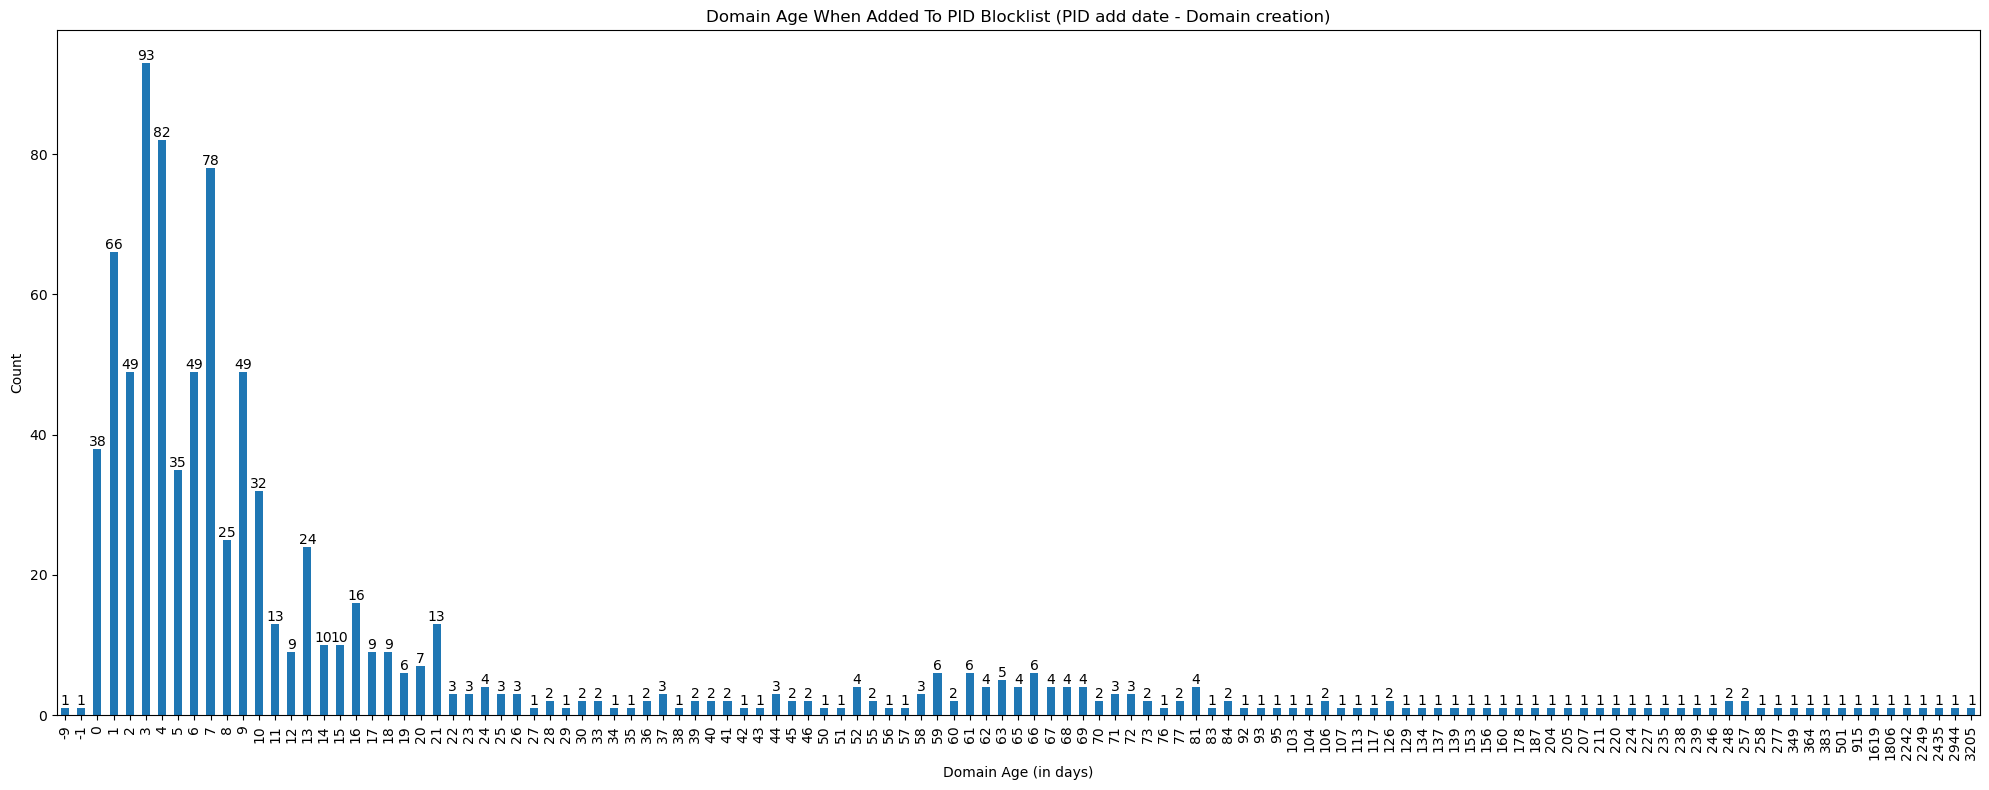

In [35]:
# Increase the figure size to accommodate the tick labels
plt.figure(figsize=(20, 8))

# Plotting the horizontal bar graph
ax = df_1000_edited['domain_age'].value_counts().sort_index().plot(kind='bar')

# Adding labels and title to the graph
plt.xlabel('Domain Age (in days)')
plt.ylabel('Count')
plt.title('Domain Age When Added To PID Blocklist (PID add date - Domain creation)')

# Adjusting spacing between tick labels
plt.tight_layout()

# Adding labels on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Displaying the graph
plt.show()


### Majority are <10 days old in age

### How does it help the team --> pickup majority within 10 days and we wait analyse before giving it to PID…. , this helps us to decide on tradeoff between we send early or find other attributes to give it more confidence
### Let's see how VT results fare

C:\Users\Jun Rong\AppData\Local\Temp\ipykernel_29716\3101419614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000_edited['vt_registration_difference_age'] = (df_1000_edited['processed_timestamp'] - df_1000_edited['whois_info.creation_date_earliest']).dt.days
C:\Users\Jun Rong\AppData\Local\Temp\ipykernel_29716\3101419614.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000_edited['vt_registration_difference_age'] += 1


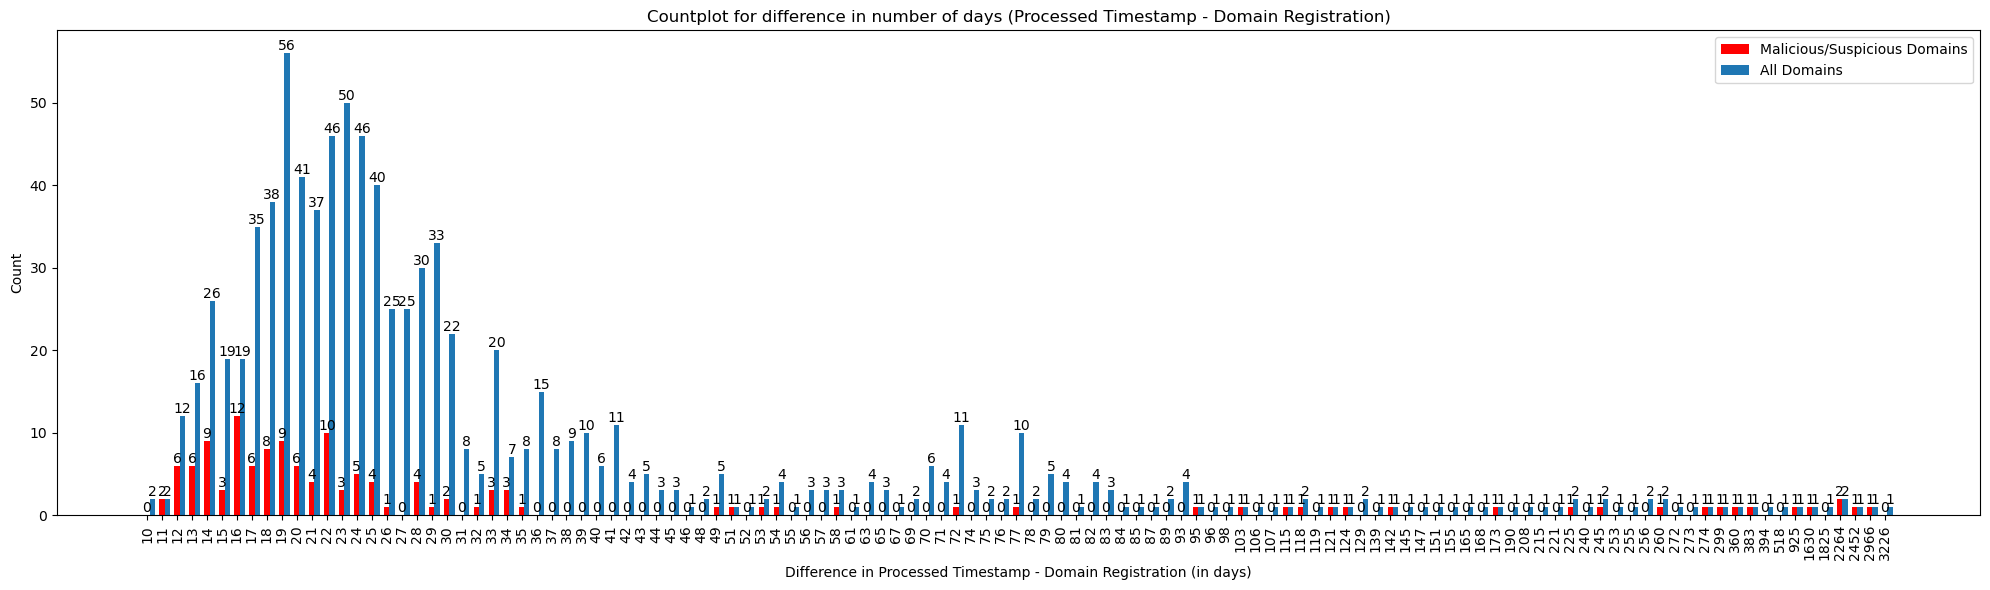

In [36]:
# df_filtered = df_1000_edited[df_1000_edited['last_analysis_stats.malicious'] > 0]
# df_filtered 
df_1000_edited['vt_registration_difference_age'] = (df_1000_edited['processed_timestamp'] - df_1000_edited['whois_info.creation_date_earliest']).dt.days
df_1000_edited['vt_registration_difference_age'] += 1
# df_1000_edited[['vt_registration_difference_age','processed_timestamp','whois_info.creation_date_earliest']]

# Data
df_filtered = df_1000_edited[(df_1000_edited['last_analysis_stats.malicious'] > 0) | (df_1000_edited['last_analysis_stats.suspicious'] > 0)]
malicious_suspicious_counts = df_filtered['vt_registration_difference_age'].value_counts().sort_index()
all_counts = df_1000_edited['vt_registration_difference_age'].value_counts().sort_index()


# Finding the common index for both counts
common_index = malicious_suspicious_counts.index.union(all_counts.index)
# common_index = all_counts.index.union(malicious_counts.index)

# Reindexing both counts with the common index
malicious_suspicious_counts = malicious_suspicious_counts.reindex(common_index, fill_value=0)
all_counts = all_counts.reindex(common_index, fill_value=0)

# Creating x-axis positions for the bars
x = np.arange(len(common_index))

# Width of each bar
width = 0.35

# Plotting
fig, ax = plt.subplots(figsize=(20, 6))

# Plotting malicious_suspicious
malicious_bars = ax.bar(x, malicious_suspicious_counts.values, width, color="red", label='Malicious/Suspicious Domains')

# Plotting all_counts
all_bars = ax.bar(x + width, all_counts.values, width, label='All Domains')

# Setting x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(common_index, rotation=90)  # Rotate labels by 90 degrees

# Setting title and y-axis label
plt.xlabel('Difference in Processed Timestamp - Domain Registration (in days)')
plt.ylabel('Count')
plt.title('Countplot for difference in number of days (Processed Timestamp - Domain Registration)')

# Adding labels on top of each bar
for bar in malicious_bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

for bar in all_bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Adding a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


### right skew, by right older ones should have been picked up by VT (our source of enriched info), but strangely results the center ones are not

In [37]:
all_counts.sort_index().head(15)

vt_registration_difference_age
10     2
11     2
12    12
13    16
14    26
15    19
16    19
17    35
18    38
19    56
20    41
21    37
22    46
23    50
24    46
Name: count, dtype: int64

In [38]:
malicious_suspicious_counts.sort_index().head(15)

vt_registration_difference_age
10     0
11     2
12     6
13     6
14     9
15     3
16    12
17     6
18     8
19     9
20     6
21     4
22    10
23     3
24     5
Name: count, dtype: int64

## Check 5: DNS --> How many domains get resolved? 

In [39]:
# df_1000['dns_info.gethostbyname_ex.other_ip_address']

df_1000_edited = df_1000
# df_1000_edited = df_1000_edited.dropna(subset=['whois_info.creation_date_earliest'])

def get_list_length(lst):
    if pd.isnull(lst):  # Check if the value is NaN
        return 0
    else:
        lst = lst.strip("[]")
        if "," in lst:
            lst = lst.split(',')
            return len(lst)
        else:
            return 1
df_1000_edited['num_resolved_ips'] = df_1000_edited['dns_info.gethostbyname_ex.other_ip_address'].apply(lambda x: get_list_length(x))
# df_1000_edited[['num_resolved_ips','dns_info.gethostbyname_ex.other_ip_address']]

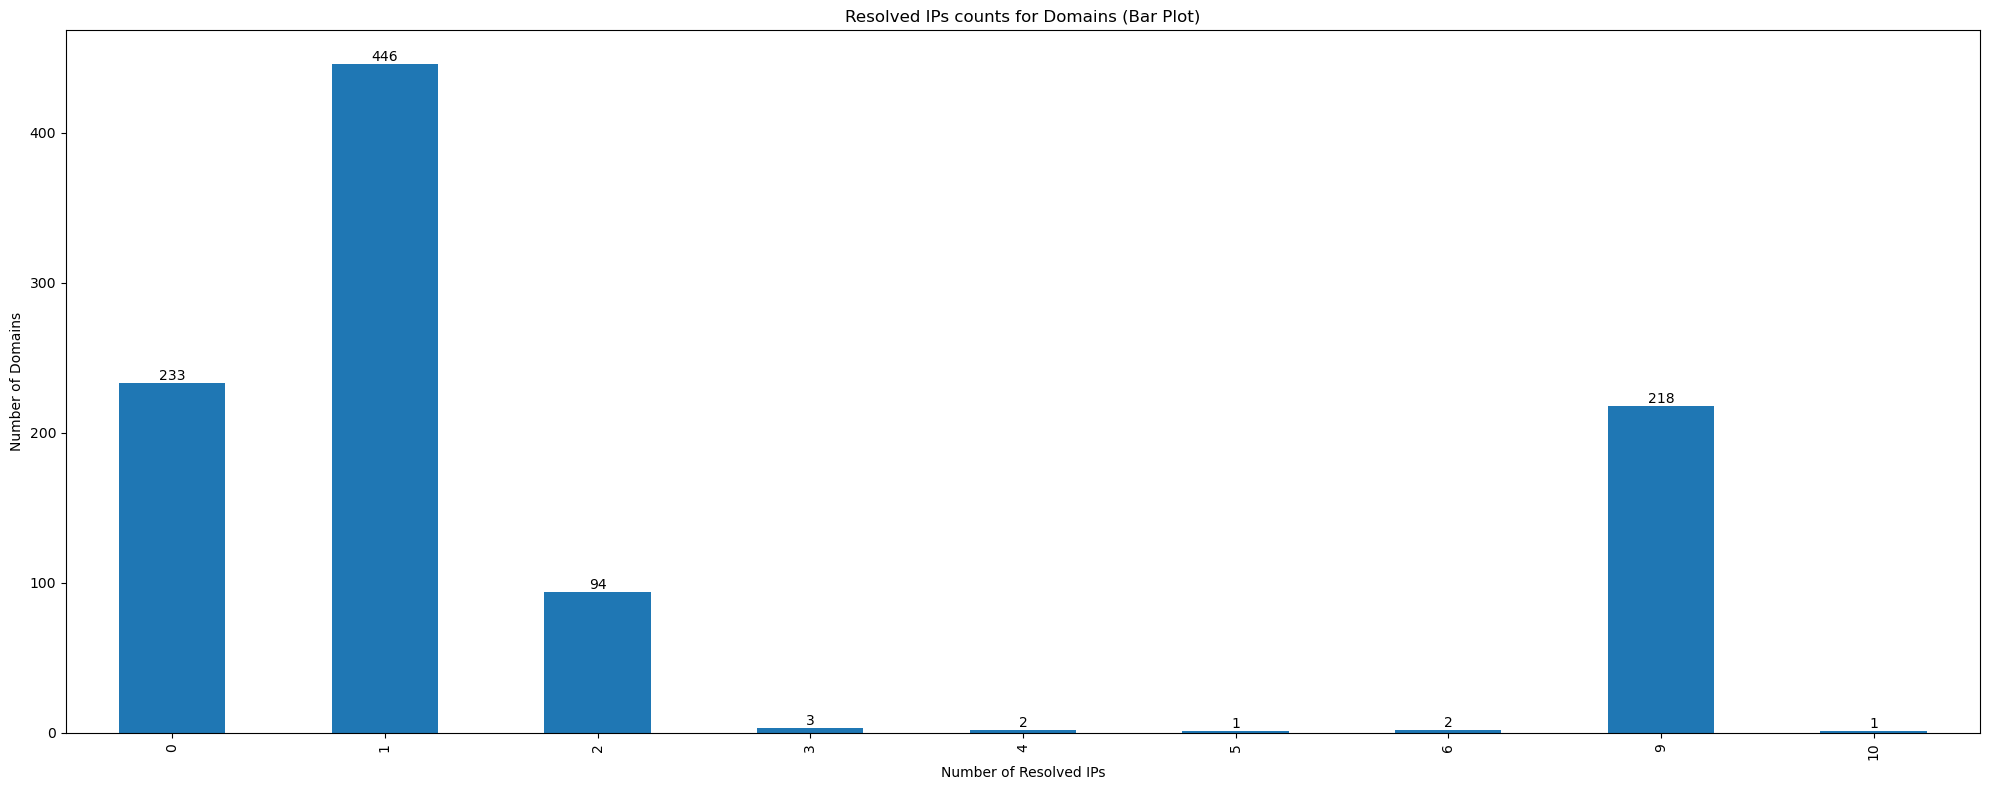

In [40]:
# Increase the figure size to accommodate the tick labels
plt.figure(figsize=(20, 8))

# Plotting the horizontal bar graph
ax = df_1000_edited['num_resolved_ips'].value_counts().sort_index().plot(kind='bar')

# Adding labels and title to the graph
plt.xlabel('Number of Resolved IPs')
plt.ylabel('Number of Domains')
plt.title('Resolved IPs counts for Domains (Bar Plot)')

# Adjusting spacing between tick labels
plt.tight_layout()

# Adding labels on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Displaying the graph
plt.show()


### Majority has 0,1,2,9 resolvable ip addresses --> 9 resolved ip seems interesting. Let's take a look

In [41]:
pd.set_option('display.max_rows', 5)
df_1000_edited.loc[df_1000_edited['num_resolved_ips'] == 9]


,Unnamed: 0,_id,domain,x_days_ago,last_analysis_date,reputation,added_timestamp,processed_timestamp,failure_count,is_priority,source,has_screenshot,has_html,has_javascript,files_log,log_file,last_analysis_stats.harmless,last_analysis_stats.malicious,last_analysis_stats.suspicious,last_analysis_stats.undetected,last_analysis_stats.timeout,total_votes.harmless,total_votes.malicious,duration_log.screenshot,duration_log.grab_html_js,duration_log.get_whois_info,duration_log.get_dns_info,duration_log.get_cert_info,duration_log.get_archived_page_info,whois_info.registrar,whois_info.name,whois_info.org,whois_info.creation_date,whois_info.updated_date,whois_info.whois_file_location,dns_info.gethostbyname_ex.alias,dns_info.gethostbyname_ex.other_ip_address,dns_info.gethostbyname_ex.gethostbyname_ex_filepath,dns_info.dns_resolver_query.nameserver_list,dns_info.dns_resolver_query.nameservers_filepath,cert_info.common_name,cert_info.name_value,cert_info.issuer_name,cert_info.not_before,cert_info.latest_cert,cert_info.length_cert_json,cert_info.cert_file_location,cert_info.len(SubjectCN_set),cert_info.SubjectCN_set,cert_info.len(Issuer_set),cert_info.Issuer_set,cert_info.len(AltName_set),cert_info.AltName_count_min,cert_info.AltName_count_max,archived_page_info.newest.archive_url,archived_page_info.newest.timestamp,archived_page_info.archived_paged_file_location,whois_info.creation_date_latest,whois_info.creation_date_earliest,blocklist_addition_date,num_resolved_ips
8,8,645b9719e7ba0a6b3d02b056,product-assign.com,7,24-04-2023T19:53:46,0,10-05-2023T21:07:37,2023-05-16 08:13:50,0,0,resources/upload_folder/23050801-LIST83-G1-MT2...,1,1,1,"[{'type': 'http_screenshot', 'stderr': ""Screen...",resources/logs/logfile_20230516_080253.367.txt,65,0,0,22,0,0,0,21.628663,22.828158,1.093247,1.322429,0.910582,0.885319,"Name.com, Inc.",Whois Agent,"Domain Protection Services, Inc.",20-04-2023T11:33:46,20-04-2023T11:33:46,resources/whois/product-assign.com_20230516_08...,"['product-assign.com', 'yy.gtm-yy.cn']","['23.224.160.106', '23.224.160.107', '23.224.1...",resources/dns/product-assign.com_gethostbyname...,"['ns1.dns.com.', 'ns2.dns.com.']",resources/dns/product-assign.com_nameservers_2...,www.product-assign.com,product-assign.com\nwww.product-assign.com,"C=US, O=Let's Encrypt, CN=R3",2023-04-20T10:41:06,2023-04-20 10:41:06,2.0,resources/cert/product-assign.com_20230516_081...,1.0,['www.product-assign.com'],1.0,"[""C=US, O=Let's Encrypt, CN=R3""]",1.0,2.0,2.0,NaN,NaN,NaN,2023-04-20 11:33:46,2023-04-20 11:33:46,2023-04-24,9
32,32,645b9719e7ba0a6b3d02b06e,squarefrescosolutions-online.com,7,21-04-2023T16:04:17,0,10-05-2023T21:07:37,2023-05-16 08:22:13,0,0,resources/upload_folder/23050801-LIST83-G1-MT2...,1,1,0,"[{'type': 'http_screenshot', 'stderr': ""Screen...",resources/logs/logfile_20230516_080253.367.txt,0,0,0,86,0,0,0,8.265256,1.858536,0.906670,1.227222,7.547662,1.166574,"Name.com, Inc.",Whois Agent,"Domain Protection Services, Inc.",19-04-2023T02:08:48,19-04-2023T02:08:48,resources/whois/squarefrescosolutions-online.c...,"['squarefrescosolutions-online.com', 'yy.gtm-y...","['23.224.160.106', '23.224.160.107', '23.224.1...",resources/dns/squarefrescosolutions-online.com...,"['ns1.dns.com.', 'ns2.dns.com.']",resources/dns/squarefrescosolutions-online.com...,squarefrescosolutions-online.com,squarefrescosolutions-online.com\nwww.squarefr...,"C=US, O=Let's Encrypt, CN=R3",2023-04-19T01:11:37,2023-04-19 01:11:37,2.0,resources/cert/squarefrescosolutions-online.co...,1.0,['squarefrescosolutions-online.com'],1.0,"[""C=US, O=Let's Encrypt, CN=R3""]",1.0,2.0,2.0,NaN,NaN,NaN,2023-04-19 02:08:48,2023-04-19 02:08:48,2023-04-25,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,879,645b9719e7ba0a6b3d02b3bd,zappz-boost.com,7,05-05-2023T16:05:25,0,10-05-2023T21:07:3

In [42]:
# df_1000_edited.loc[df_1000_edited['num_resolved_ips'] == 9]
df_filtered = df_1000_edited.loc[df_1000_edited['num_resolved_ips'] == 9, ['domain','whois_info.registrar','whois_info.name','dns_info.gethostbyname_ex.other_ip_address','dns_info.dns_resolver_query.nameserver_list']]
df_filtered

,domain,whois_info.registrar,whois_info.name,dns_info.gethostbyname_ex.other_ip_address,dns_info.dns_resolver_query.nameserver_list
8,product-assign.com,"Name.com, Inc.",Whois Agent,"['23.224.160.106', '23.224.160.107', '23.224.1...","['ns1.dns.com.', 'ns2.dns.com.']"
32,squarefrescosolutions-online.com,"Name.com, Inc.",Whois Agent,"['23.224.160.106', '23.224.160.107', '23.224.1...","['ns1.dns.com.', 'ns2.dns.com.']"
...,...,...,...,...,...
879,zappz-boost.com,"Name.com, Inc.",Whois Agent,"['23.224.160.106', '23.224.160.107', '23.224.1...","['ns1.dns.com.', 'ns2.dns.com.']"
993,hachi-api.com,"Name.com, Inc.",Whois Agent,"['23.224.160.106', '23.224.160.107', '23.224.1...","['ns1.dns.com.', 'ns2.dns.com.']"


In [43]:
columns_to_check = ['whois_info.registrar', 'whois_info.name', 'dns_info.gethostbyname_ex.other_ip_address', 'dns_info.dns_resolver_query.nameserver_list']
duplicates = df_filtered.duplicated(subset=columns_to_check, keep=False)
duplicates.value_counts()

True    218
Name: count, dtype: int64

In [44]:
df_1000_edited.loc[df_1000_edited['num_resolved_ips'] == 9]['dns_info.gethostbyname_ex.other_ip_address'][8]

"['23.224.160.106', '23.224.160.107', '23.224.160.108', '23.224.160.109', '23.224.160.110', '23.225.157.203', '23.225.157.204', '23.225.157.205', '23.225.157.206']"

### Interestingly, datasets with 9 resolved ips have the same registrar, ns, ip address....

Assuming 9 ips is not naturally occurring in other datasets, in the wild most domains don’t have 9 IP then we can consider it is something that is warranted to look into abit more. From the angle of analysis, this is an interesting outlier

### Let's look at how VT does

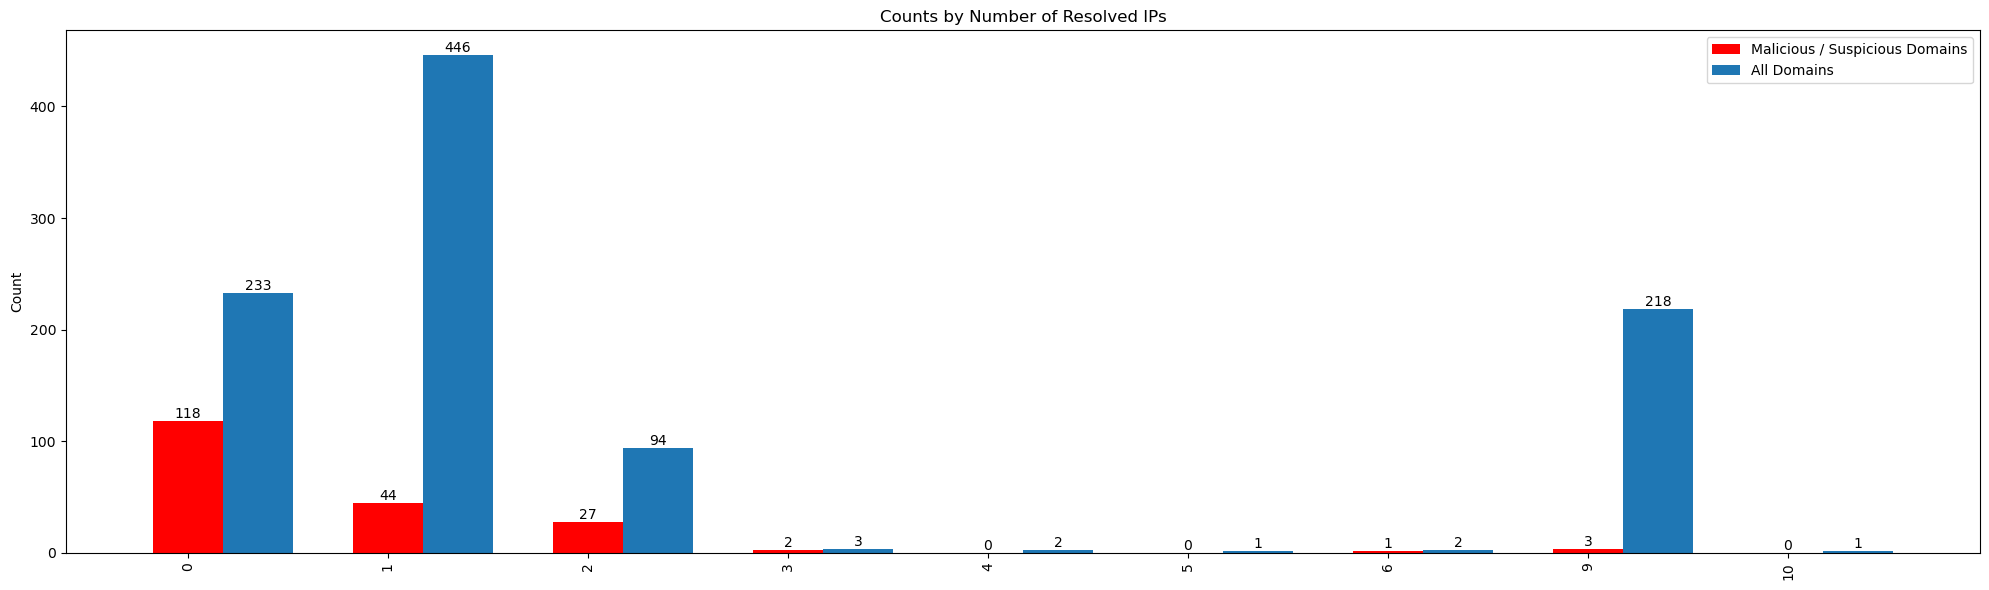

In [45]:
# Data
df_filtered = df_1000_edited[(df_1000_edited['last_analysis_stats.malicious'] > 0) | (df_1000_edited['last_analysis_stats.suspicious'] > 0)]

malicious_counts = df_filtered['num_resolved_ips'].value_counts().sort_index()
all_counts = df_1000_edited['num_resolved_ips'].value_counts().sort_index()


# Finding the common index for both counts
common_index = malicious_counts.index.union(all_counts.index)
# common_index = all_counts.index.union(malicious_counts.index)

# Reindexing both counts with the common index
malicious_counts = malicious_counts.reindex(common_index, fill_value=0)
all_counts = all_counts.reindex(common_index, fill_value=0)

# Creating x-axis positions for the bars
x = np.arange(len(common_index))

# Width of each bar
width = 0.35

# Plotting
fig, ax = plt.subplots(figsize=(20, 6))

# Plotting malicious_counts
malicious_bars = ax.bar(x, malicious_counts.values, width, color="red", label='Malicious / Suspicious Domains')

# Plotting all_counts
all_bars = ax.bar(x + width, all_counts.values, width, label='All Domains')

# Setting x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(common_index, rotation=90)  # Rotate labels by 90 degrees

# Setting title and y-axis label
ax.set_title('Counts by Number of Resolved IPs')
ax.set_ylabel('Count')

# Adding labels on top of each bar
for bar in malicious_bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

for bar in all_bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Adding a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


## Final Check 6: For VT malicious and Suspicious flags, which engine is most "active"?
### VT pulls results (malicious/suspicious/....) from 86-88 engines, we want to see which engines are consistently active

In [46]:
# Create a list of dataframe names
df_names = ['df1', 'df2', 'df3', 'df4']

# Create a new column to store the dataframe names
df1['DataFrame'] = df_names[0]
df2['DataFrame'] = df_names[1]
df3['DataFrame'] = df_names[2]
df4['DataFrame'] = df_names[3]

# Concatenate the dataframes vertically
combined_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Create a new column based on the condition
combined_df['malicious_or_suspicious'] = (combined_df['last_analysis_stats.malicious'] > 0) | (combined_df['last_analysis_stats.suspicious'] > 0)

# # Display the updated DataFrame
# combined_df[['malicious_or_suspicious','last_analysis_stats.malicious','last_analysis_stats.suspicious']]


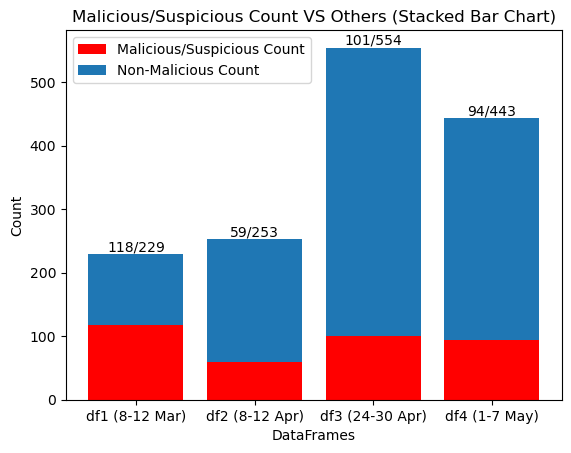

In [47]:
# Create a list of dataframe names
df_names = ['df1 (8-12 Mar)', 'df2 (8-12 Apr)', 'df3 (24-30 Apr)', 'df4 (1-7 May)']

# Create a new column to store the dataframe names
df1['DataFrame'] = df_names[0]
df2['DataFrame'] = df_names[1]
df3['DataFrame'] = df_names[2]
df4['DataFrame'] = df_names[3]

# Concatenate the dataframes vertically
combined_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Create a new column based on the condition
combined_df['malicious_or_suspicious'] = (combined_df['last_analysis_stats.malicious'] > 0) | (combined_df['last_analysis_stats.suspicious'] > 0)

# Group the data by DataFrame and calculate the counts
grouped_df = combined_df.groupby('DataFrame')['malicious_or_suspicious'].sum()

# Get the total counts for each DataFrame
total_counts = combined_df['DataFrame'].value_counts().reindex(df_names, fill_value=0)

# Create a list of DataFrame names
dataframes = grouped_df.index.tolist()

# Create a stacked bar plot
plt.bar(dataframes, grouped_df, label='Malicious/Suspicious Count', color='red')
plt.bar(dataframes, total_counts - grouped_df, bottom=grouped_df, label='Non-Malicious Count')

# Add count labels on top of each bar
for i, (count, total_count) in enumerate(zip(grouped_df, total_counts)):
    plt.text(i, total_count, f'{count}/{total_count}', ha='center', va='bottom')

# Set labels and title
plt.xlabel('DataFrames')
plt.ylabel('Count')
plt.title('Malicious/Suspicious Count VS Others (Stacked Bar Chart)')

# Add legend
plt.legend()

# Show the plot
plt.show()


### these are the ones that are picked up by VT

### Infer --> Possible that it takes time for the VT engines to detect them as malicious/suspicious, when is the optimal time to VT call then? (t+2) months?

=======================

### Checking 'active' engine

In [48]:
## dwelve into engine level 

## get list of json filenames in df
df_1000_domains = df_1000[['domain']] + ".json"
df_twobatch_domains = df_twobatch[['domain']] + ".json"
combined_list = df_1000_domains['domain'].tolist() + df_twobatch_domains['domain'].tolist()



## auto assign value:0 when key is given
engine_malicious_counts = defaultdict(int)
engine_suspicious_counts = defaultdict(int)
# engine_malicious_counts = {}

path_to_json_files = "downloaded_vtresponse"
# json_file_names = [filename for filename in os.listdir(path_to_json_files) if filename.endswith('.json')]
json_file_names = [filename for filename in os.listdir(path_to_json_files) if filename in combined_list]


for json_file_name in json_file_names:
    with open(os.path.join(path_to_json_files, json_file_name)) as file:
        json_data = json.load(file)
        # Extract the last_analysis_results from the JSON data
        last_analysis_results = json_data['data']['attributes']['last_analysis_results']
#         print("last_analysis_results:", last_analysis_results)

        # Update the malicious count for each engine
        for each in last_analysis_results.values():
#             print("each:", result)
            category = each['category']
            if category == 'malicious':
                engine_name = each['engine_name']
                engine_malicious_counts[engine_name] += 1
            
            elif category == "suspicious":
                engine_name = each['engine_name']
                engine_suspicious_counts[engine_name] += 1
                
# print(engine_malicious_counts)
sorted_dict = sorted(engine_malicious_counts.items(), key=lambda x: x[1], reverse=True)
print(sorted_dict)

# Find the engine with the maximum malicious count
top_engine = max(engine_malicious_counts, key=engine_malicious_counts.get)
print(f"\n Top engine with the most MALICIOUS count: {top_engine}\n")


# print(engine_malicious_counts)
sorted_dict = sorted(engine_suspicious_counts.items(), key=lambda x: x[1], reverse=True)
print(sorted_dict)

# Find the engine with the maximum malicious count
top_engine = max(engine_suspicious_counts, key=engine_suspicious_counts.get)
print(f"\n Top engine with the most SUSPICIOUS count: {top_engine}")

[('CyRadar', 282), ('alphaMountain.ai', 243), ('G-Data', 241), ('Sophos', 232), ('Avira', 225), ('BitDefender', 222), ('Fortinet', 213), ('Heimdal Security', 185), ('Lionic', 179), ('Kaspersky', 151), ('Webroot', 135), ('AlphaSOC', 135), ('Seclookup', 126), ('ESET', 122), ('Netcraft', 120), ('Antiy-AVL', 119), ('VIPRE', 119), ('Google Safebrowsing', 114), ('Emsisoft', 109), ('CRDF', 101), ('Cluster25', 99), ('Forcepoint ThreatSeeker', 91), ('Phishtank', 87), ('Viettel Threat Intelligence', 80), ('Segasec', 69), ('Chong Lua Dao', 45), ('Trustwave', 41), ('CMC Threat Intelligence', 33), ('Phishing Database', 13), ('Quick Heal', 12), ('Bfore.Ai PreCrime', 6), ('PhishFort', 3), ('ADMINUSLabs', 3), ('Xcitium Verdict Cloud', 3), ('OpenPhish', 2), ('malwares.com URL checker', 2), ('0xSI_f33d', 2), ('Yandex Safebrowsing', 1), ('ESTsecurity', 1), ('Lumu', 1), ('Certego', 1), ('Scantitan', 1), ('SCUMWARE.org', 1), ('Dr.Web', 1)]

 Top engine with the most MALICIOUS count: CyRadar

[('alphaMounta

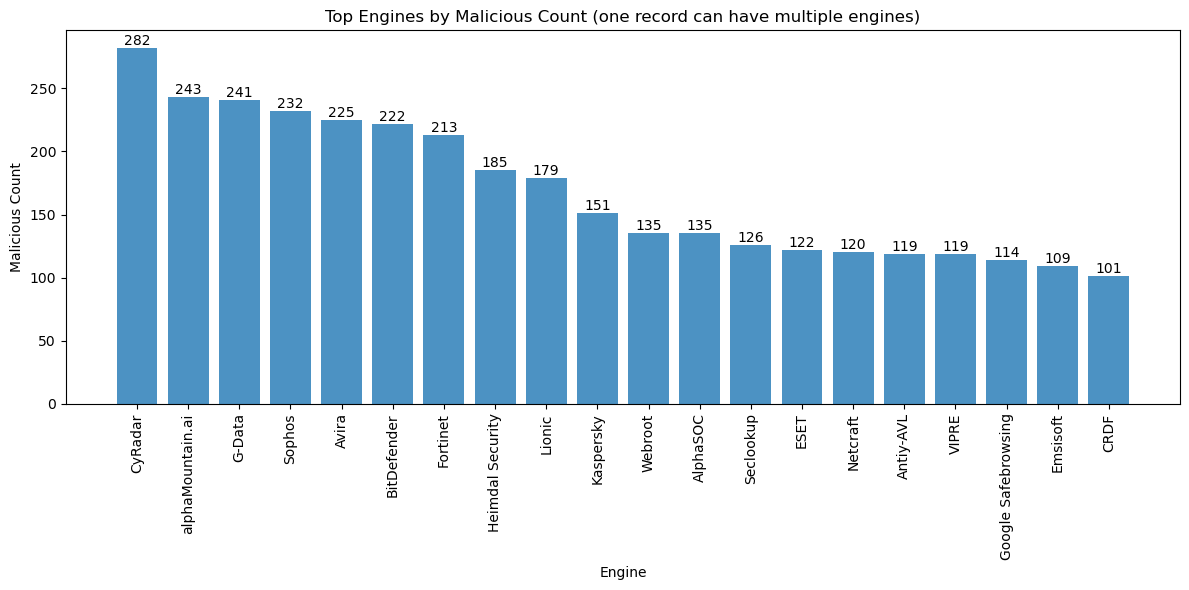

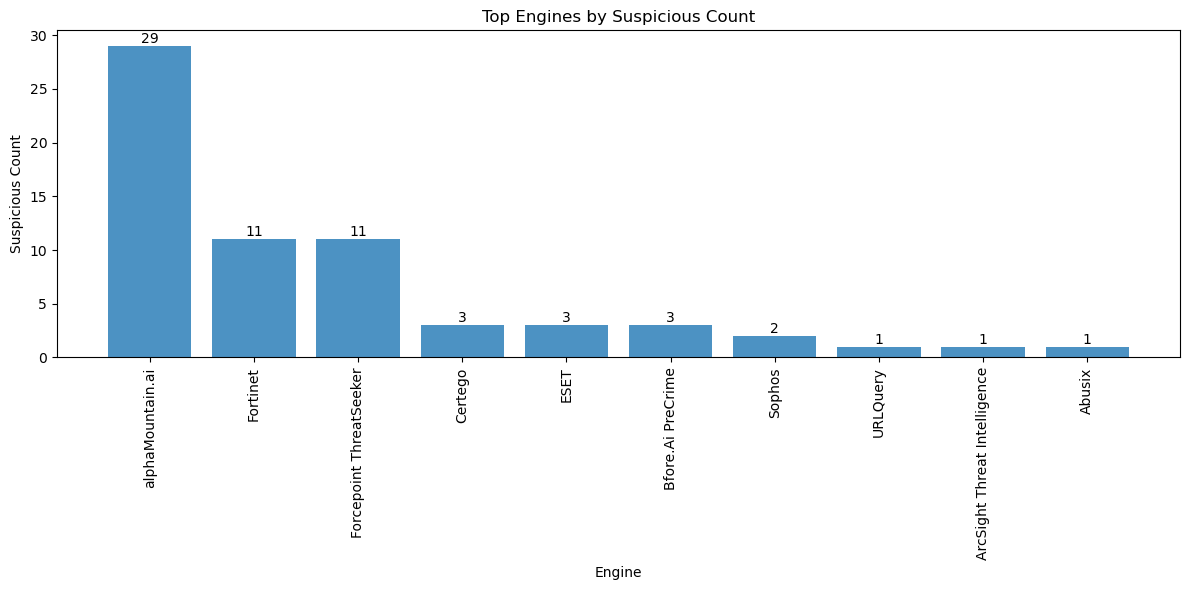

In [49]:
import matplotlib.pyplot as plt

# Get the top 20 engines with the highest malicious counts, or all available records if fewer than 20
top_malicious_engines = sorted(engine_malicious_counts.items(), key=lambda x: x[1], reverse=True)[:20]
malicious_engine_names, malicious_counts = zip(*top_malicious_engines)

# Get the top 20 engines with the highest suspicious counts, or all available records if fewer than 20
top_suspicious_engines = sorted(engine_suspicious_counts.items(), key=lambda x: x[1], reverse=True)[:20]
suspicious_engine_names, suspicious_counts = zip(*top_suspicious_engines)

# Set the x-axis positions for the bars
x_pos_malicious = range(len(malicious_engine_names))
x_pos_suspicious = range(len(suspicious_engine_names))

# Plot the bar graph for top malicious engines
plt.figure(figsize=(12, 6))
plt.bar(x_pos_malicious, malicious_counts, align='center', alpha=0.8)
plt.xticks(x_pos_malicious, malicious_engine_names, rotation=90)
plt.xlabel('Engine')
plt.ylabel('Malicious Count')
plt.title('Top Engines by Malicious Count (one record can have multiple engines)')

# Add count labels on top of each bar
for i, count in enumerate(malicious_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plot the bar graph for top suspicious engines
plt.figure(figsize=(12, 6))
plt.bar(x_pos_suspicious, suspicious_counts, align='center', alpha=0.8)
plt.xticks(x_pos_suspicious, suspicious_engine_names, rotation=90)
plt.xlabel('Engine')
plt.ylabel('Suspicious Count')
plt.title('Top Engines by Suspicious Count')

# Add count labels on top of each bar
for i, count in enumerate(suspicious_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


###  Top engine with the most MALICIOUS count: CyRadar

###  Top engine with the most SUSPICIOUS count: alphaMountain.ai

### More or less since PID list is correct, so statistically these are the ones that seem to be more active in detecting malicious domains that PID has blocked, and we should focus on these more!  
